##  Proyecto Final de Diplomatura en Ciencia de Datos con R y Python

#  Análisis de Sentimientos y Ventas  en E-commerce

####💡 Aplicando Procesamiento de Lenguaje Natural (NLP) y Machine Learning para la clasificación automática de reseñas y cuantificación del impacto económico en un E-commerce brasileño.

📌 Autor:  
👨‍💻 Rostagno Mauricio

📚 Carrera:  
🎓 Diplomatura en Ciencia de Datos con R y Python

📌 Tutor:  
👨‍🏫 Ing. Julio Paredes


🎓 Instituto: Data Science Argentina


## Análisis de Sentimientos y Visualización de Patrones en el E-commerce Brasileño (Olist) 🛒🇧🇷

---

### 📝 **Descripción del Dataset**
Este proyecto utiliza un dataset de Olist con 100.000 pedidos de 2016 a 2018 en Brasil, que incluye:
- 📦 Estado de los pedidos y envíos
- 💳 Precios, pagos y costos de envío
- 🌍 Ubicación de clientes
- 🛍️ Atributos de productos
- 📝 Reseñas de clientes

Los datos han sido anonimizados.

---

### 🎯 **Objetivos del Proyecto**
- 📊 **Análisis Exploratorio de Datos (EDA)**: Visualizaciones para identificar patrones en comportamiento de clientes, envíos y reseñas.
- 🧠 **Procesamiento de Lenguaje Natural (NLP)**: Análisis de sentimientos en portugués usando LeIA.
- 🤖 **Modelado Predictivo**: Implementación de modelos de Machine Learning para predecir sentimientos de clientes.
- 💰 **Evaluación Económica**: Análisis del impacto económico  y satisfacción del cliente.

---

### 🔧 **Metodología**
- **Preprocesamiento**: Limpieza, transformación y generación de nuevas características.
- **Análisis Visual**: Gráficos interactivos.
- **NLP con LeIA**: Tokenización, vectorización y análisis de sentimientos.
- **Modelos de ML**: Comparación de algoritmos para predicción de sentimientos.
- **Evaluación**: Métricas de rendimiento y análisis económico.

---

### 📈 **Resultados Esperados**
- Identificación de factores clave que influyen en la satisfacción de los clientes.
- Patrones en el comportamientoy su impacto económico.
- Propuestas de optimización basadas en insights de los datos.

---

## 📚 Librerias

In [ ]:
#  Instalación de librería específica para análisis de sentimientos en portugués
!pip install leia-br

#  Acceso a Google Drive
from google.colab import drive

#  Librerías para Manipulación y Análisis de Datos
import pandas as pd  # Análisis y manipulación de datos
import numpy as np  # Operaciones numéricas y manejo de arrays
import random  # Generación de números aleatorios

#  Visualización de Datos
import matplotlib.pyplot as plt  # Gráficos básicos
from matplotlib.colors import LinearSegmentedColormap  # Crear paletas de colores personalizadas
import seaborn as sns  # Gráficos estadísticos mejorados
import plotly.express as px  # Visualizaciones interactivas
import plotly.graph_objects as go  # Visualizaciones avanzadas con plotly


#  Procesamiento de Texto (NLP)
import string  # Manipulación de cadenas (puntuación, etc.)
import re  # Expresiones regulares para limpieza de texto
import nltk  # Procesamiento del lenguaje natural
from nltk.corpus import stopwords  # Palabras vacías
from nltk.tokenize import word_tokenize  # Tokenización de texto
from nltk.util import ngrams  # Creación de n-gramas
from collections import Counter  # Contar frecuencias de elementos
from wordcloud import WordCloud  # Generación de nubes de palabras

#  Descargar recursos de NLTK (necesarios para tokenización y stopwords)
nltk.download('stopwords')
nltk.download('punkt')

#  Análisis de Sentimientos en Portugués
from LeIA import SentimentIntensityAnalyzer

#  Librerías de Machine Learning - Modelos Clásicos
from sklearn.feature_extraction.text import TfidfVectorizer  # Vectorizador TF-IDF
from sklearn.preprocessing import LabelEncoder, label_binarize  # Codificación de etiquetas
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # División de datos y búsqueda de hiperparámetros
from sklearn.linear_model import LogisticRegression  # Regresión Logística
from sklearn.ensemble import RandomForestClassifier  # Random Forest

#  Librerías de Deep Learning - Redes Neuronales
from tensorflow.keras.models import Sequential  # Modelo secuencial
from tensorflow.keras.layers import Dense, Dropout  # Capas densas y dropout
from tensorflow.keras.utils import to_categorical  # Codificación one-hot para redes
from tensorflow.keras.optimizers import Adam  # Optimizador Adam

#  Métricas de Evaluación
from sklearn.metrics import (
    accuracy_score,  # Precisión general
    precision_score,  # Precisión por clase
    recall_score,  # Recall por clase
    f1_score,  # F1-score
    classification_report,  # Reporte completo de métricas
    confusion_matrix,  # Matriz de confusión
    ConfusionMatrixDisplay,  # Visualización de matriz de confusión
    roc_curve,  # Curva ROC
    roc_auc_score,  # AUC-ROC
    auc  # Área bajo la curva
)

#  Utilidades para Ajustar Pesos y Estandarizar Datos
from sklearn.preprocessing import StandardScaler  # Escalado de datos
from sklearn.utils.class_weight import compute_class_weight  # Pesos balanceados para clases desbalanceadas


## 📂 Carga de Datos desde Google Drive

En este bloque de código, montamos Google Drive para acceder a los archivos necesarios que serán la base de nuestro análisis.
 El dataset utilizado proviene de un e-commerce brasileño y está compuesto por varias tablas relacionales que nos permiten explorar el proceso de compra de punta a punta, desde los productos hasta las opiniones de los clientes.

###  ¿Qué contiene el dataset?
Estas tablas describen el comportamiento del e-commerce y nos brindan una visión detallada del ciclo de venta:

| Tabla                | Descripción                                                                                             |
|----------------------|---------------------------------------------------------------------------------------------------------|
| **df_items**          | Detalles de los artículos dentro de los pedidos (productos comprados por pedido).                      |
| **df_reseñas**        | Opiniones de los clientes sobre los productos (reseñas y calificaciones).                              |
| **df_pedidos**        | Información de cada pedido realizado (fechas, estado de entrega, etc.).                                |
| **df_productos**      | Detalles de los productos (categoría, dimensiones, peso, etc.).                                        |
| **df_geolocalizacion**| Datos de geolocalización asociados a las direcciones de clientes y vendedores.                        |
| **df_vendedores**     | Información de los vendedores que comercializan los productos.                                         |
| **df_pagos**          | Detalles de los pagos realizados en cada pedido (formas de pago, cuotas, montos).                     |
| **df_clientes**       | Información de los clientes (ubicación, identificación por ID único).                                 |
| **df_categoria**      | Traducción de los nombres de las categorías de los productos (del portugués al inglés).               |

### ⚙️ ¿Cómo cargamos los datos?
- Definimos una ruta base en Google Drive donde están guardados los archivos `.csv`.
- Cargamos cada tabla en un DataFrame de pandas.
- Si algún archivo falta o hay un error, se muestra un mensaje de advertencia.



In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta base donde se encuentran los archivos en Google Drive
ruta_base = "/content/drive/My Drive/Colab Notebooks/Porfolio/E-commerce brazilian/"

# Diccionario con nombres de archivos y sus correspondientes nombres en castellano
archivos = {
    "olist_order_items_dataset.csv": "df_items",
    "olist_order_reviews_dataset.csv": "df_reseñas",
    "olist_orders_dataset.csv": "df_pedidos",
    "olist_products_dataset.csv": "df_productos",
    "olist_geolocation_dataset.csv": "df_geolocalizacion",
    "olist_sellers_dataset.csv": "df_vendedores",
    "olist_order_payments_dataset.csv": "df_pagos",
    "olist_customers_dataset.csv": "df_clientes",
    "product_category_name_translation.csv": "df_categoria"
}

# Cargamos los archivos en DataFrames
dataframes = {}  # Diccionario para almacenar los DataFrames
for archivo, nombre_df in archivos.items():
    ruta_completa = ruta_base + archivo
    try:
        dataframes[nombre_df] = pd.read_csv(ruta_completa)  # Cargar el archivo en un DataFrame
        print(f"Cargado: {nombre_df} desde {archivo}")  # Mensaje de confirmación
    except FileNotFoundError:
        print(f"Error: No se pudo encontrar el archivo {archivo} en {ruta_base}")
    except Exception as e:
        print(f"Error inesperado al cargar {archivo}: {e}")

# Asignar los DataFrames a nuevos nombre
if "df_items" in dataframes:
    df_items = dataframes["df_items"]
if "df_reseñas" in dataframes:
    df_reseñas = dataframes["df_reseñas"]
if "df_pedidos" in dataframes:
    df_pedidos = dataframes["df_pedidos"]
if "df_productos" in dataframes:
    df_productos = dataframes["df_productos"]
if "df_geolocalizacion" in dataframes:
    df_geolocalizacion = dataframes["df_geolocalizacion"]
if "df_vendedores" in dataframes:
    df_vendedores = dataframes["df_vendedores"]
if "df_pagos" in dataframes:
    df_pagos = dataframes["df_pagos"]
if "df_clientes" in dataframes:
    df_clientes = dataframes["df_clientes"]
if "df_categoria" in dataframes:
    df_categoria = dataframes["df_categoria"]



## 🔍 Exploración Inicial de los DataFrames

Antes de **sumergirnos en el análisis profundo**, es fundamental **entender la estructura y calidad de los datos** con los que vamos a trabajar.  
Para esto, definimos una **función llamada `explorar_dataframe()`** que **nos permite inspeccionar rápidamente cada tabla del dataset** y **detectar posibles problemas**.

### 🧪 ¿Qué hace esta función?
Por cada DataFrame, la función **devuelve un diagnóstico exprés** con los siguientes puntos clave:

-  **Información general:**  
  Muestra el tamaño del DataFrame, los nombres de las columnas, sus tipos de datos y la memoria que ocupa  
  `df.info()`

-  **Valores nulos:**  
  Detecta **columnas con datos faltantes** y **cuántos registros vacíos hay en cada una**.

-  **Valores únicos:**  
  Cuenta **cuántos valores diferentes tiene cada columna**, útil para **identificar claves únicas, categorías o posibles errores**.




## 🔗  Relación entre las Tablas

###  **Pedidos (orders)**  
-  **order_id:** Es a clave primaria en esta tabla y se relaciona con varias tablas: Ítems de Pedidos, Reseñas, Pagos y Clientes.  
-  **Descripción:** Contiene información general sobre cada pedido, como estado del pedido, cliente, fechas de compra, entrega y estimación, entre otros.

---

### 📦 **Ítems de Pedidos (order_items)**  
- **order_id:** **Clave foránea** que **se refiere a la tabla de Pedidos**, vinculando cada ítem con un pedido específico.  
-  **product_id:** **Relaciona con la tabla de Productos**. Cada ítem está asociado con un producto específico.  
-  **seller_id:** **Relaciona con la tabla de Vendedores**, indicando **qué vendedor ofreció el producto**.

---

### ⭐ **Reseñas de Clientes (reviews)**  
-  **order_id:** **Relaciona con la tabla de Pedidos**, indicando que **una reseña está asociada con un pedido específico**.  
-  **review_id:** **Clave primaria única para cada reseña**, pero **NO tiene relación directa con otras tablas**.

---

### 🛍️ **Productos (products)**  
-  **product_id:** **Clave primaria** que **se vincula con la tabla Ítems de Pedidos** a través de la columna `product_id`.  
-  **Relación con Categorías:**  Relaciona los productos con los pedidos en los que están involucrados y con **la tabla de Traducción de Categorías** mediante la columna `product_category_name`, **para traducir el nombre de la categoría al inglés**.

---

### 🗺️ **Geolocalización (geolocation)**  
-  **geolocation_zip_code_prefix:** **Relacionado con la tabla Clientes** mediante la columna `zip_code_prefix`. Permite **asociar la ubicación geográfica** de los pedidos con los clientes.  
-  **geolocation_city** y  **geolocation_state:**  **Asocian la ciudad y el estado** con los **datos de clientes y pedidos**.

---

### 🏪 **Vendedores (sellers)**  
-  **seller_id:** **Relaciona con la tabla Ítems de Pedidos**, indicando **el vendedor que ofrece un producto determinado**.

---

### 💳 **Pagos (payments)**  
-  **order_id:** **Relaciona con la tabla Pedidos**, indicando **qué pedido tiene asociado un pago**.  
-  **payment_sequential:** **Número secuencial** que **refleja la secuencia de los pagos** en un mismo pedido (útil **si hay múltiples pagos**).

---

### 🧑 **Clientes (customers)**  
-  **customer_id:** **Relaciona con la tabla Pedidos** y **con la tabla Geolocalización**. Además, **vincula al cliente con el pedido realizado**.  
-  **customer_state:** **Asocia al cliente con su ubicación geográfica**, vinculando con **los datos de geolocalización**.


## ✅ Unimos los DataFrames usando claves comunes


In [ ]:
# Unimos los DataFrames usando claves comunes

# 1. Unimos la tabla de pedidos con los detalles de productos
df = df_pedidos.merge(df_items, on='order_id', how='inner')

# 2. Unimos la tabla de pagos por 'order_id', ya que un pedido puede tener varios pagos
df = df.merge(df_pagos, on='order_id', how='inner', validate='m:m')

# 3. Unimos la tabla de reseñas de productos, si está disponible
df = df.merge(df_reseñas, on='order_id', how='inner')

# 4. Relacionamos con la tabla de productos usando 'product_id'
df = df.merge(df_productos, on='product_id', how='inner')

# 5. Incorporamos la información del cliente usando 'customer_id'
df = df.merge(df_clientes, on='customer_id', how='inner')

# 6. Unimos la información del vendedor usando 'seller_id'
df = df.merge(df_vendedores, on='seller_id', how='inner')

# Mostramos información del DataFrame final para verificar que la unión se hizo correctamente
print(df.info())


## 🔍 Análisis Exploratorio de Datos (EDA)

Antes de sumergirnos en **modelos predictivos y análisis complejos**, **debemos
conocer a fondo nuestro dataset**.

### 🛠️ ¿Qué haremos en esta etapa?
1. **Explorar la estructura y tipos de datos**.
2. **Identificar valores nulos o inconsistencias**.
3. **Observar las distribuciones** de las variables numéricas y categóricas.
4. **Visualizar relaciones claves** entre pedidos, reseñas, pagos y sentimientos.


In [12]:
# Observemos las primeros  5  filas de nuestro DF
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2023-10-02 10:56:33,2023-10-02 11:07:15,2023-10-04 19:55:00,2023-10-10 21:25:13,2023-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2023-10-02 10:56:33,2023-10-02 11:07:15,2023-10-04 19:55:00,2023-10-10 21:25:13,2023-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2023-10-02 10:56:33,2023-10-02 11:07:15,2023-10-04 19:55:00,2023-10-10 21:25:13,2023-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2024-07-24 20:41:37,2024-07-26 03:24:27,2024-07-26 14:31:00,2024-08-07 15:27:45,2024-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2024-08-08 08:38:49,2024-08-08 08:55:23,2024-08-08 13:50:00,2024-08-17 18:06:29,2024-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


## 🕒  Conversión de Fechas a Formato Datetime

 **Nos aseguramos de que las columnas de fecha estén en formato datetime**.  
 **Convertimos las columnas:**
- **`order_purchase_timestamp`** → Fecha y hora de la compra.
- **`order_delivered_customer_date`** → Fecha de entrega al cliente.

⚙️ **Objetivo:** Garantizar que ambas **estén en el formato adecuado para facilitar cálculos y análisis temporales** más adelante.




In [13]:
# Nos aseguramos de que las columnas de fecha estén en formato datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])  # Fecha y hora de compra
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])  # Fecha de entrega al cliente



## 🗓️  Extracción de Información Clave de la Fecha de Compra

🔍 **Para facilitar el análisis temporal**, **extraemos detalles relevantes** de la columna `order_purchase_timestamp`:

-  **Año**  
-  **Hora**  
-  **Mes**  
-  **Día de la semana**  
-  **Período mensual**

⚙️ **Objetivo:** Enriquecer el análisis con **variables temporales** que nos permitan **detectar patrones estacionales o tendencias de compra**.


In [14]:
# Extraemos información clave de la fecha de compra
df['year'] = df['order_purchase_timestamp'].dt.year                    # Año de la compra
df['hour'] = df['order_purchase_timestamp'].dt.hour                    # Hora del día en la que se realizó la compra
df['month'] = df['order_purchase_timestamp'].dt.month                  # Mes de la compra (1 = Enero, ..., 12 = Diciembre)
df['date'] = df['order_purchase_timestamp'].dt.to_period('M')          # Periodo mensual
df['day_of_week_int'] = df['order_purchase_timestamp'].dt.weekday + 1  # Día de la semana (1 = Lunes, ..., 7 = Domingo)

## 📦 Cálculo del Tiempo de Entrega en Días

 **Calculamos el tiempo que tarda cada pedido en ser entregado**, restando:

- **Fecha de entrega (`order_delivered_customer_date`)**  
- **Fecha de compra (`order_purchase_timestamp`)**

 **Resultado:**  
Obtenemos **el tiempo de entrega en días** para **cada pedido**.

⚙️ **Objetivo:**  
**Analizar los tiempos de entrega** y **detectar posibles demoras** que **puedan impactar en la satisfacción del cliente**.


In [15]:
#  Calculamos el tiempo de entrega en días
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


## 💰 Análisis de Tendencias de Ventas

### 📅 Tendencia de Ventas Mensuales  

El siguiente gráfico muestra la evolución de las ventas mensuales en el e-commerce, permitiéndonos **identificar tendencias a lo largo del tiempo**.

 **Gráfico Interactivo:**  
Nos permite acercarnos a períodos específicos y detectar patrones estacionales o cambios en el comportamiento de compra.

 **Objetivo:**  
Visualizar el flujo de ingresos y entender mejor el comportamiento temporal del negocio.


In [ ]:


#  Agrupamos las ventas mensuales sumando los precios de los productos vendidos
ventas_mensuales = df.groupby(['order_id', df['order_purchase_timestamp'].dt.to_period('M')])['price'].sum().reset_index()
ventas_mensuales = ventas_mensuales.groupby('order_purchase_timestamp')['price'].sum().reset_index()
ventas_mensuales['order_purchase_timestamp'] = ventas_mensuales['order_purchase_timestamp'].astype(str)
#  Creamos un gráfico interactivo de líneas con Plotly
fig = px.line(
    ventas_mensuales,
    x='order_purchase_timestamp',
    y='price',
    markers=True,
    title='Tendencia de Ventas Mensuales',
    labels={'order_purchase_timestamp': 'Mes', 'price': 'Total de Ventas ($)'}
)

#  Ajustamos detalles del gráfico
fig.update_traces(line=dict(width=2), marker=dict(size=8))
fig.update_layout(
    xaxis=dict(tickangle=-45, tickfont=dict(size=12)),  # Giramos las etiquetas del eje X
    yaxis=dict(tickfont=dict(size=12)),  # Ajustamos fuente del eje Y
    template='plotly_dark',  # Tema oscuro
    hovermode='x'  # Muestra valores al pasar el cursor
)



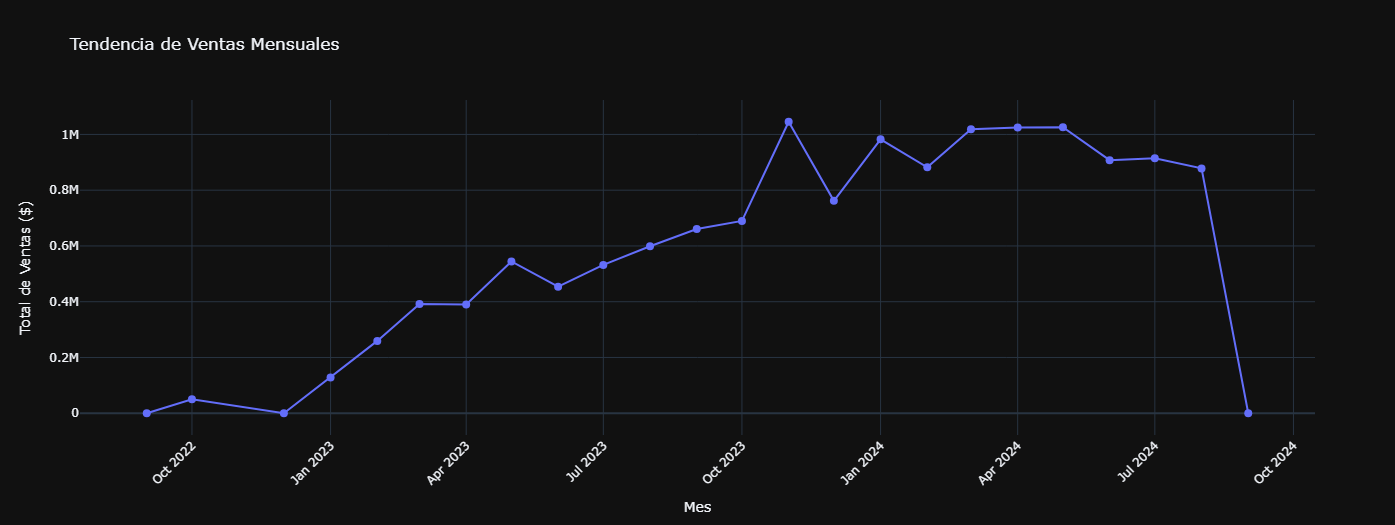

## 🛒 Top 10 Categorías de Productos más Vendidos

 **Este gráfico interactivo presenta las 10 categorías de productos con mayor volumen de ventas en el e-commerce**.

 **¿Por qué es importante?**
- Nos permite **entender qué tipos de productos concentran la mayor demanda**.
- Facilita **tomar decisiones estratégicas** sobre **marketing, inventario y promociones**.

⚙️ **Objetivo:**  
**Identificar las categorías clave que impulsan las ventas** y **potenciar su rendimiento**.


In [ ]:
#  Contamos la cantidad de pedidos por categoría y tomamos las 10 más vendidas
categorias_top = df[['order_id', 'product_category_name']].drop_duplicates().value_counts('product_category_name').head(10).reset_index()
categorias_top.columns = ['Categoría de Producto', 'Cantidad de Pedidos']

#  Gráfico interactivo de barras con Plotly
fig = px.bar(
    categorias_top,
    x='Categoría de Producto',
    y='Cantidad de Pedidos',
    text='Cantidad de Pedidos',
    title='📦 Top 10 Categorías de Productos más Vendidos',
    labels={'Cantidad de Pedidos': 'Número de Pedidos'},
    color='Cantidad de Pedidos',  # Colorea las barras según su valor
    color_continuous_scale='viridis'
)

#  Personalización del gráfico
fig.update_traces(textposition='outside', marker=dict(line=dict(color='black', width=1)))  # Bordes y etiquetas
fig.update_layout(
    xaxis=dict(tickangle=-45, tickfont=dict(size=12)),  # Rotamos etiquetas del eje X
    yaxis=dict(tickfont=dict(size=12)),  # Ajustamos fuente del eje Y
    template='plotly_dark',  # Tema oscuro
    hovermode='x'  # Muestra valores al pasar el cursor
)

#  Mostramos el gráfico interactivo
fig.show()

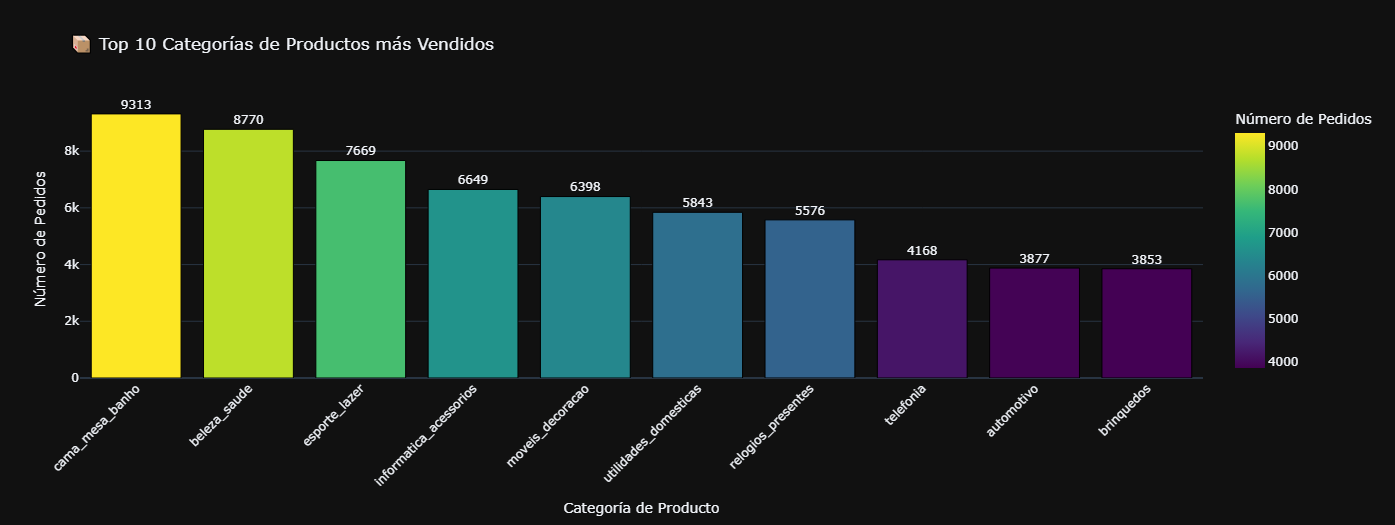

## 💳 Distribución de Ventas por Método de Pago

 **Este gráfico visualiza la distribución de las ventas según los distintos métodos de pago utilizados por los clientes**.

 **¿Por qué es importante?**
- Permite **identificar los medios de pago más populares** entre los clientes.
- Facilita **evaluar el impacto de cada método en las ventas totales**.
- **Podemos optimizar las opciones de pago** y **mejorar la experiencia del cliente**.

⚙️ **Objetivo:**  
**Comprender las preferencias de los clientes en los métodos de pago** y **adaptar la estrategia comercial** en función de estos patrones.


In [ ]:
#  Agrupamos las ventas totales por tipo de pago
ventas_por_pago = df[['order_id', 'payment_type', 'payment_value']].drop_duplicates().groupby('payment_type')['payment_value'].sum().reset_index()
ventas_por_pago.columns = ['Método de Pago', 'Ventas Totales']


#  Gráfico interactivo de barras horizontales
fig = px.bar(
    ventas_por_pago.sort_values(by='Ventas Totales', ascending=True),  # Ordenamos de menor a mayor
    x='Ventas Totales',
    y='Método de Pago',
    text='Ventas Totales',
    title='💳 Distribución de Ventas por Método de Pago',
    labels={'Ventas Totales': 'Monto Total de Ventas (BRL)'},
    orientation='h',  # Barras horizontales
    color='Ventas Totales',
    color_continuous_scale='tealgrn'
)

#  Personalización del gráfico
fig.update_traces(
    texttemplate='%{text:.2f}', textposition='inside',  # Muestra valores dentro de las barras
    marker=dict(line=dict(color='black', width=1))  # Bordes negros para mejor contraste
)
fig.update_layout(
    xaxis=dict(title='Monto Total de Ventas (BRL)', tickfont=dict(size=12)),
    yaxis=dict(title='Método de Pago', tickfont=dict(size=12)),
    template='plotly_dark',  # Tema oscuro
    hovermode='y'  # Muestra detalles al pasar el cursor
)

#  Mostramos el gráfico interactivo
fig.show()


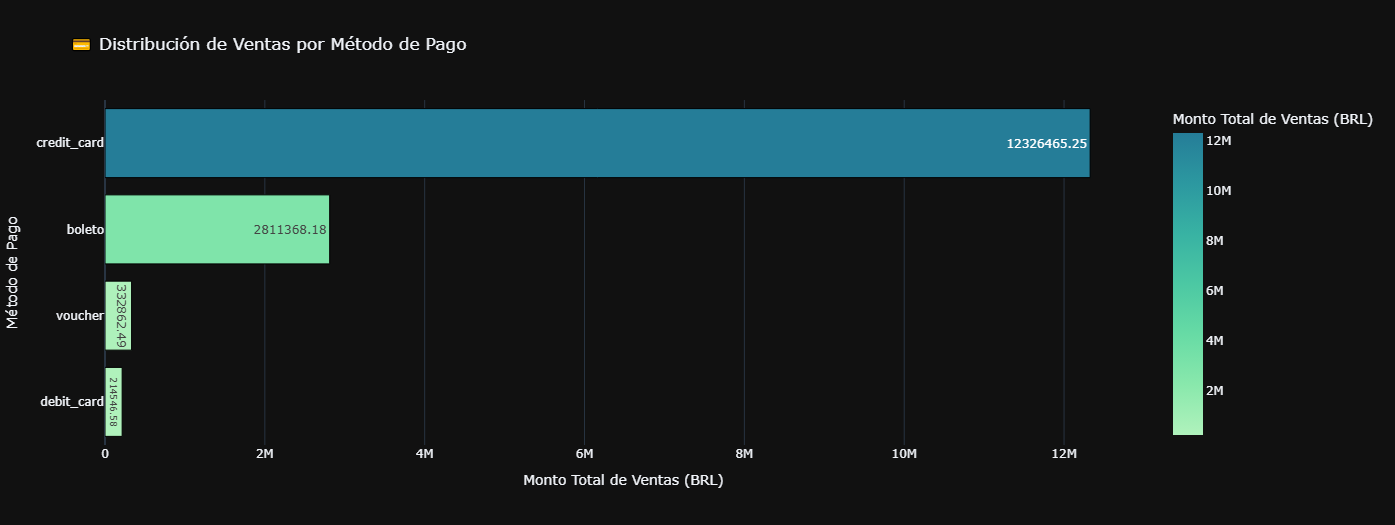

## ⭐ Distribución de Puntajes de Reseñas

 **Este gráfico representa la distribución de las reseñas según el puntaje otorgado por los clientes**.

 **¿Por qué es importante?**
- Permite **visualizar la frecuencia de cada calificación**.
- Nos ayuda a **identificar si las reseñas son predominantemente positivas, negativas o neutras**.
- Es clave para **evaluar la satisfacción general de los clientes** y **detectar áreas de mejora**.

⚙️ **Objetivo:**  
**Comprender la percepción de los clientes sobre sus compras** y **utilizar esta información para optimizar la experiencia del consumidor**.



In [ ]:
#  Contamos la cantidad de reseñas por puntaje
puntajes_resenas = df[['review_id', 'review_score']].drop_duplicates().groupby('review_score').size().reset_index(name='Cantidad de Reseñas')
puntajes_resenas.columns = ['Puntaje', 'Cantidad de Reseñas']


#  Gráfico interactivo de barras
fig = px.bar(
    puntajes_resenas.sort_values(by='Puntaje'),
    x='Puntaje',
    y='Cantidad de Reseñas',
    text='Cantidad de Reseñas',
    title='🌟 Distribución de Puntajes de Reseñas',
    labels={'Puntaje': 'Puntaje de Reseña', 'Cantidad de Reseñas': 'Frecuencia'},
    color='Cantidad de Reseñas',
    color_continuous_scale='sunset'
)

#  Personalización del gráfico
fig.update_traces(
    texttemplate='%{text}', textposition='outside',
    marker=dict(line=dict(color='black', width=1))
)
fig.update_layout(
    xaxis=dict(title='Puntaje de Reseña', tickmode='linear', tickfont=dict(size=12)),
    yaxis=dict(title='Cantidad de Reseñas', tickfont=dict(size=12)),
    template='plotly_dark',
    hovermode='x'
)

#  Mostramos el gráfico interactivo
fig.show()


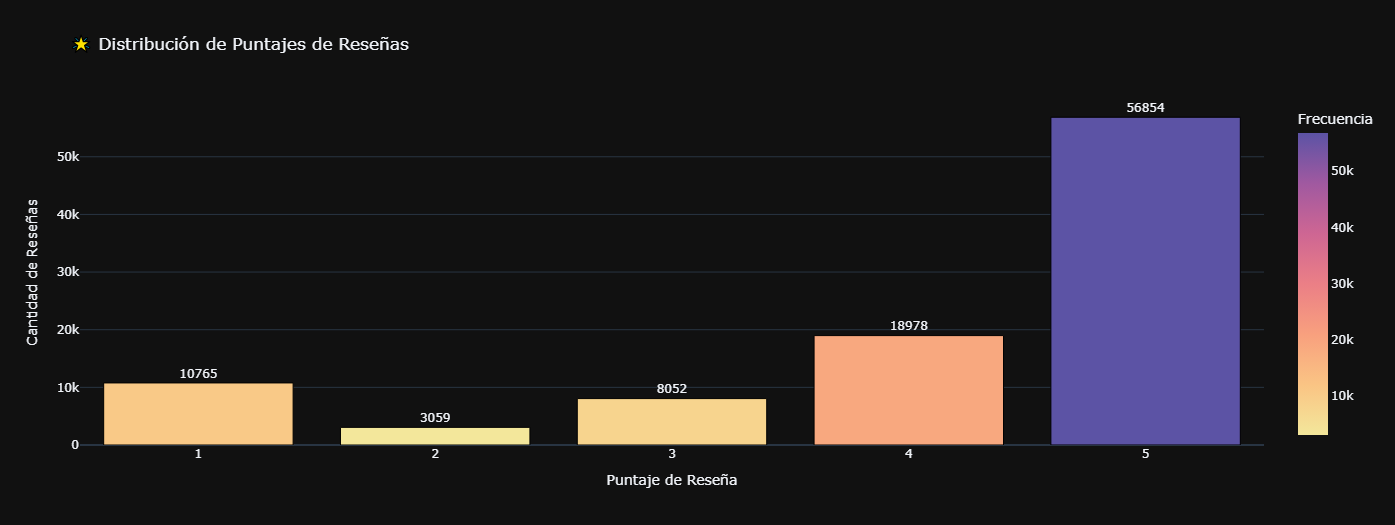

### 📦 Tiempo de Entrega por Categoría de Producto


Este gráfico muestra cómo varía el tiempo de entrega según la categoría del producto. Queremos analizar:

- ✅ Diferencias en tiempos de entrega entre productos.
- ✅ Categorías con envíos consistentemente rápidos o lentos.
- ✅ Presencia de outliers, que pueden indicar demoras excepcionales.

Usaremos un boxplot interactivo con:

-  Orden de categorías según mediana de entrega.
-  Hover con detalles sobre los datos.
-  Escala logarítmica para evitar distorsión por valores extremos.

In [ ]:
# Contamos la cantidad de entradas por categoria de productos que tenemos
category_counts = df[['order_id', 'product_category_name']].drop_duplicates().value_counts('product_category_name')
# definimos un umbral
threshold = 3000
common_categories = category_counts[category_counts >= threshold].index

# Creación de la columna 'simplified_category' para categorizar
df['simplified_category'] = df['product_category_name'].where(df['product_category_name'].isin(common_categories), 'Other')

# Ordenamos las categorías por la mediana de tiempo de entrega
orden_categorias = df.groupby('simplified_category')['delivery_time'].median().sort_values().index

# Creamos el boxplot interactivo con Plotly
fig = px.box(
    df,
    x='delivery_time',
    y='simplified_category',
    color='simplified_category',
    category_orders={'simplified_category': orden_categorias},  # Ordenamos por mediana
    points='all',  # Mostrar todos los puntos para ver la dispersión
    title='📦 Tiempo de Entrega por Categoría de Producto'
)

# Personalización del diseño
fig.update_layout(
    xaxis_title="Tiempo de Entrega (Días)",
    yaxis_title="Categoría de Producto",
    xaxis=dict(
        tickmode='array',
        tickvals=[i for i in range(0, int(df['delivery_time'].max()) + 50, 50)],  # Escala de 50 en 50
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        tickmode='linear',  # Aseguramos que las categorías sean distribuidas linealmente
        tickangle=0,  # Evitamos que las etiquetas se roten demasiado
        tickfont=dict(size=12)  # Ajustamos el tamaño de la fuente de las categorías
    ),
    showlegend=False,
    height=800,  # Aumentamos el tamaño del gráfico
    width=1000,  # Aumentamos el tamaño del gráfico
    plot_bgcolor='black',  # Fondo negro para el gráfico
    paper_bgcolor='black',  # Fondo negro para toda la figura
    font=dict(color='white')  # Texto blanco para contraste
)

# Mostrar el gráfico
fig.show()

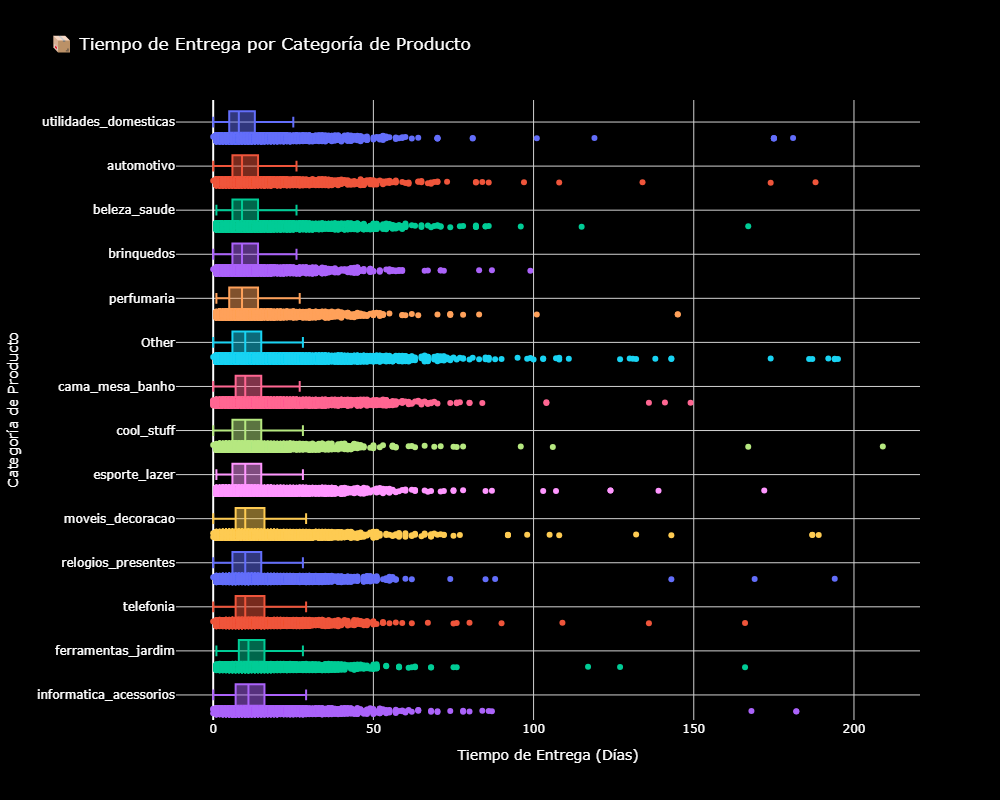

### 📦 Promedio de Tiempo de Entrega por Día de la Semana.

Este gráfico de barras muestra el promedio del tiempo de entrega (en días) para cada día de la semana. Los días de la semana están representados en el eje X, y el tiempo de entrega promedio en el eje Y. Se observa cómo varía el tiempo de entrega según el día de la semana, lo que puede indicar patrones o variaciones en la logística o la carga de trabajo a lo largo de los días. El gráfico es útil para identificar si ciertos días son más propensos a tener entregas más rápidas o más lentas, y permite a los responsables de la logística tomar decisiones informadas para optimizar los tiempos de entrega.

In [ ]:
df['order_id'].value_counts().unique()


array([63, 38, 29, 26, 24, 22, 21, 20, 19, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
# Calculamos la media de tiempo de entrega por día de la semana
# Eliminamos duplicados para quedarnos con un solo registro por pedido
df_unico_pedido = df.drop_duplicates(subset='order_id')
avg_delivery_time = df_unico_pedido.groupby('day_of_week_int')['delivery_time'].mean().reset_index()
# Creamos el gráfico de barras
fig = px.bar(
    avg_delivery_time,
    x='day_of_week_int',
    y='delivery_time',
    color='day_of_week_int',
    title='📦 Promedio de Tiempo de Entrega por Día de la Semana',
    labels={'day_of_week_int': 'Día de la Semana', 'delivery_time': 'Tiempo de Entrega Promedio (Días)'},
)

# Personalización del diseño
fig.update_layout(
    xaxis_title="Día de la Semana",
    yaxis_title="Tiempo de Entrega Promedio (Días)",
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'],
        tickfont=dict(size=12),
        showgrid=False,  # Desactivar la grilla en el eje X
    ),
    yaxis=dict(
        tickmode='linear',
        tickvals=[0, 50, 100, 150, 200],  # Rango del eje Y de a 50
        tickfont=dict(size=12),
    ),
    showlegend=False,
    height=600,
    width=1000,
    plot_bgcolor='black',  # Fondo negro
    paper_bgcolor='black',  # Fondo negro
    font=dict(color='white'),  # Texto en blanco
)

# Mostrar el gráfico
fig.show()




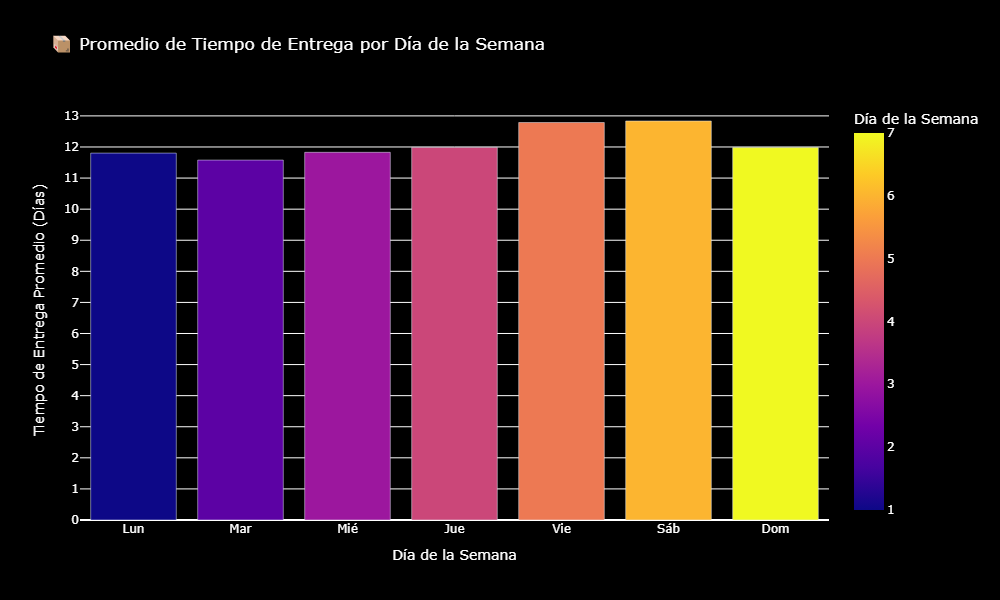

## 🔗 Mapa de Correlaciones

**Este gráfico muestra la matriz de correlación entre variables numéricas relevantes del dataset**.  
**Nos permite identificar relaciones lineales** entre diferentes características, lo cual **es útil para detectar patrones e interpretar mejor los datos**.

### 📋 ¿Qué Variables Analizamos?
| Variable                | Descripción                                               |
|--------------------------|-----------------------------------------------------------|
| `price`                  | Precio del producto.                                      |
| `review_score`           | Puntaje de reseña otorgado por el cliente (1 a 5).        |
| `delivery_time`          | Tiempo de entrega en días.                               |
| `payment_value`          | Valor total pagado por el pedido.                        |
| `freight_value`          | Costo del envío.                                          |
| `payment_installments`   | Cantidad de cuotas elegidas por el cliente.              |                          |
| `hour`                   | Hora de la compra.                                       |
| `month`                  | Mes de la compra.                                        |




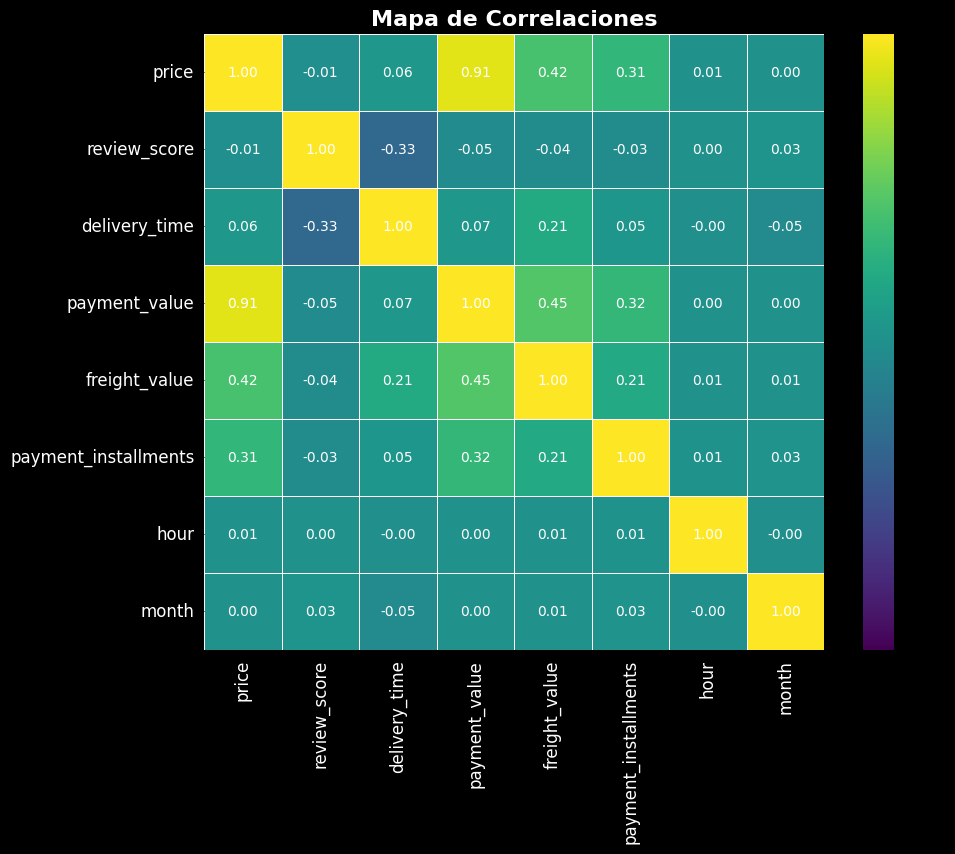

In [ ]:
#  Seleccionamos las variables relevantes para el análisis de correlación
df_unico_pedido = df.drop_duplicates(subset='order_id')

correlation_features = df_unico_pedido[['price', 'review_score', 'delivery_time',
                                        'payment_value', 'freight_value',
                                        'payment_installments',
                                        'hour', 'month']]
#  Calculamos la matriz de correlación entre las variables seleccionadas
correlation = correlation_features.corr()

#  Definimos el mapa de colores "viridis" para el gráfico
viridis_cmap = plt.cm.viridis

#  Configuramos el tamaño de la figura y el color de fondo
plt.figure(figsize=(10, 8))

#  Creamos el mapa de calor con la matriz de correlaciones
sns.heatmap(correlation,            # Matriz de correlación calculada
            annot=True,             # Mostrar los valores numéricos en el gráfico
            cmap=viridis_cmap,      # Paleta de colores "viridis"
            vmin=-1, vmax=1,        # Rango de valores entre -1 y 1 (correlación)
            fmt=".2f",              # Formato de los números con 2 decimales
            linewidths=.5)          # Espesor de las líneas divisorias

#  Añadimos un título con formato para resaltar mejor
plt.title('Mapa de Correlaciones', fontsize=16, fontweight='bold', color='white')

#  Personalizamos el fondo del gráfico y del área de ejes a negro
plt.gcf().set_facecolor('black')    # Fondo general negro
plt.gca().set_facecolor('black')    # Fondo de los ejes negro

#  Cambiamos el color de los textos de los ejes a blanco para contraste
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

#  Cambiamos el color de los valores dentro del heatmap a blanco
for t in plt.gca().texts:
    t.set_color('white')

#  Mostramos el gráfico
plt.show()


## ☁️ Nube de Palabras de Comentarios de Reseña

📖 **Descripción:**  

Este gráfico presenta una nube de palabras generada a partir de los comentarios de reseñas de productos.  
Las palabras más grandes representan los términos mencionados con mayor frecuencia por los clientes.

🎨 **Aspecto Visual:**  

La nube de palabras se despliega sobre un fondo negro con colores pastel, logrando que las palabras resalten con claridad, facilitando la identificación rápida de los términos más comunes.

🔍 **¿Por qué es útil?**

- Permite detectar rápidamente los temas recurrentes en las reseñas, como aspectos del producto, tiempos de entrega o problemas frecuentes.
- Es una herramienta visual ideal para captar la percepción general de los clientes sin necesidad de leer cada comentario individualmente.


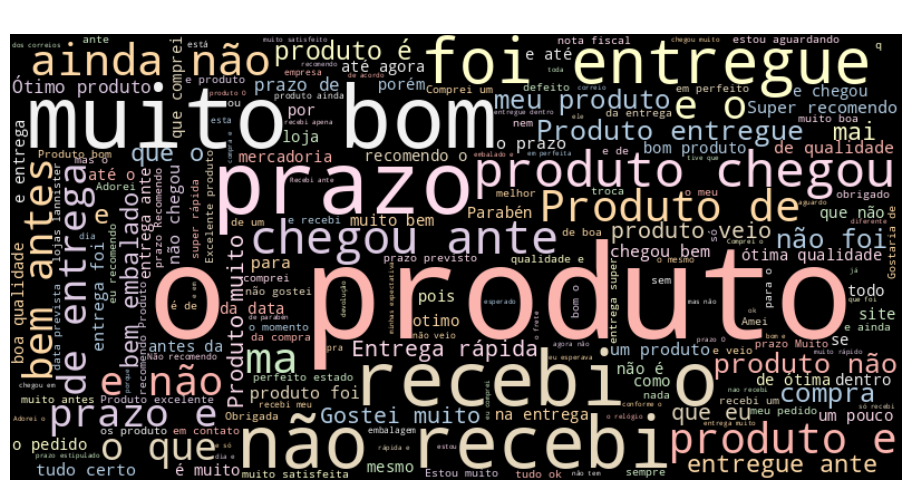

In [ ]:
# Unimos los comentarios en portugués para crear la nube de palabras
text = ' '.join(df[['review_id', 'review_comment_message']].drop_duplicates(subset='review_id')['review_comment_message'].dropna())


# Creamos la nube de palabras con fondo negro
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',  # Fondo negro
    colormap='Pastel1'  # Colores pastel para la nube
).generate(text)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultamos los ejes
plt.title('Nube de Palabras de Comentarios de Reseña', fontsize=16, fontweight='bold', color='white')  # Título en blanco

plt.tight_layout()
plt.show()


📝 🔍 Selección de Datos para Análisis de Lenguaje Natural (NLP)

📖 **Descripción:**  
En esta fase **extraemos las columnas clave** del conjunto de datos **que serán utilizadas en el análisis de lenguaje natural (NLP)**.  
**Nuestro enfoque está puesto en las reseñas de los clientes**, ya que **constituyen la fuente principal de información cualitativa** sobre **la experiencia del comprador**.

📦 **Columnas Seleccionadas:**
-  **review_comment_title:** Título de la reseña.
-  **review_comment_message:** Cuerpo del mensaje de la reseña.
-  **product_category_name:** Categoría del producto al que pertenece la reseña.

🔍 **¿Por qué es importante este paso?**
- **Nos permite centrar el análisis en la opinión del cliente**, capturando **sus comentarios y la categoría del producto asociado**.
- **Verificamos el contenido y formato de las primeras filas** para **asegurarnos de que los datos sean adecuados** y **estén preparados para el preprocesamiento textual** en las próximas etapas de NLP.

⚙️ **Objetivo:**  
**Garantizar que trabajamos con los datos correctos** y **preparar el terreno para limpiar, tokenizar y analizar los textos de reseñas**.  
Este paso es **fundamental para obtener información valiosa del lenguaje de los clientes**.



In [ ]:
# Seleccionamos las columnas relevantes para el análisis de lenguaje natural (NLP)
df_comentarios = df[['review_id', 'review_comment_title', 'review_comment_message', 'product_category_name']].drop_duplicates(subset='review_id')


# Mostramos las primeras filas del dataframe seleccionado para revisar los datos
df_comentarios.head()

,review_id,review_comment_title,review_comment_message,product_category_name
0,a54f0611adc9ed256b57ede6b6eb5114,NaN,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas
3,8d5266042046a06655c8db133d120ba5,Muito boa a loja,Muito bom o produto.,perfumaria
4,e73b67b67587f7644d5bd1a52deb1b01,NaN,NaN,automotivo
5,359d03e676b3c069f62cadba8dd3f6e8,NaN,O produto foi exatamente o que eu esperava e e...,pet_shop
6,e50934924e227544ba8246aeb3770dd4,NaN,NaN,papelaria


### 🔍 **Revisión de Valores Faltantes en el Dataset de Comentarios**

En este paso, realizamos un análisis de los valores faltantes (**NaN**) en las columnas de nuestro dataset `df_comentarios`. La presencia de valores faltantes puede afectar el análisis posterior, por lo que es importante identificar y manejar estos casos.

1. **Conteo de valores faltantes por columna**: Utilizamos el método `isna().sum()` para obtener el número total de valores faltantes en cada columna del dataframe.
   
2. **Conteo específico para la columna `review_comment_message`**: Como esta columna es clave para el análisis de texto, verificamos cuántos valores faltantes existen específicamente en ella.

Mostramos los resultados para comprender mejor la cantidad de datos faltantes y determinar las acciones a seguir, como la imputación o eliminación de estos valores.



In [ ]:
# Contamos el número de valores faltantes (NaN) en cada columna del dataframe 'df_comentarios'
nan_counts = df_comentarios.isna().sum()

# Mostramos el total de valores faltantes en la columna 'review_comment_message'
nan_count_review_comment_message = df_comentarios['review_comment_message'].isna().sum()

# Mostramos el resultado
print("Valores faltantes por columna: ", nan_counts)
print(f"Valores faltantes en 'review_comment_message': {nan_count_review_comment_message}")


Valores faltantes por columna:  review_id                     0
review_comment_title      86252
review_comment_message    57529
product_category_name      1401
dtype: int64
Valores faltantes en 'review_comment_message': 57529


### 🧹 **Eliminación de Duplicados en el Dataset de Comentarios**

### Explicación:
Este paso se encarga de eliminar los registros duplicados en la columna `review_comment_message`. La duplicación de comentarios puede sesgar el análisis, por lo que es esencial mantener solo las primeras ocurrencias.

1. **Función `eliminar_duplicados`**: Utilizamos esta función para eliminar los duplicados basándonos en la columna seleccionada (`review_comment_message`).
   
2. **Verificación**: Después de eliminar los duplicados, mostramos el número total de registros en el dataframe limpio y mostramos las primeras filas para verificar el cambio.

Este proceso asegura que los comentarios en el análisis sean únicos y representativos.



In [ ]:
# Función para eliminar duplicados basados en una columna específica

def eliminar_duplicados(df, columna='review_comment_message'):
    # Eliminamos los duplicados basándonos en la columna seleccionada
    df = df.drop_duplicates(subset=[columna], keep='first').reset_index(drop=True)

    # Mostramos el total de registros después de eliminar los duplicados
    print(f"Total de registros después de eliminar duplicados en '{columna}': {df.shape[0]}")

    return df

# Aplicamos la función para eliminar duplicados basados en 'review_comment_message'
df_comentarios = eliminar_duplicados(df_comentarios, 'review_comment_message')

# Verificamos los primeros registros del dataframe limpio
df_comentarios.head()


Total de registros después de eliminar duplicados en 'review_comment_message': 35692


,review_id,review_comment_title,review_comment_message,product_category_name
0,a54f0611adc9ed256b57ede6b6eb5114,NaN,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas
1,8d5266042046a06655c8db133d120ba5,Muito boa a loja,Muito bom o produto.,perfumaria
2,e73b67b67587f7644d5bd1a52deb1b01,NaN,NaN,automotivo
3,359d03e676b3c069f62cadba8dd3f6e8,NaN,O produto foi exatamente o que eu esperava e e...,pet_shop
4,e07549ef5311abcc92ba1784b093fb56,NaN,fiquei triste por n ter me atendido.,NaN


### 🧹 **Eliminación de Filas con Valores Nulos en Comentarios**




In [ ]:
# Eliminamos filas con valores nulos en 'review_comment_message'
df_comentarios = df_comentarios.dropna(subset=['review_comment_message'])
print(df_comentarios.head())

                          review_id review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114                  NaN   
1  8d5266042046a06655c8db133d120ba5     Muito boa a loja   
3  359d03e676b3c069f62cadba8dd3f6e8                  NaN   
4  e07549ef5311abcc92ba1784b093fb56                  NaN   
5  15898b543726a832d4137fbef5d1d00e                  NaN   

                              review_comment_message  product_category_name  
0  Não testei o produto ainda, mas ele veio corre...  utilidades_domesticas  
1                               Muito bom o produto.             perfumaria  
3  O produto foi exatamente o que eu esperava e e...               pet_shop  
4               fiquei triste por n ter me atendido.                    NaN  
5                         Aguardando retorno da loja     ferramentas_jardim  


## 📝 Procesamiento de Texto (NLP) en el Dataset de Comentarios

### 🧠 Introducción
En esta sección **aplicamos técnicas de Procesamiento de Lenguaje Natural (NLP)** sobre **los comentarios de los clientes**.  
**El objetivo principal es limpiar y preparar los textos** para luego **extraer información valiosa**, como:
- **Nubes de Palabras**   
- **Análisis de Sentimientos**  
- **Patrones de palabras frecuentes**

🧼 **Limpiar el texto es clave** para **garantizar que los modelos de análisis trabajen con datos precisos** y **evitar ruido**.

---

### ⚙️ Pasos Realizados

1. **Conversión a minúsculas:**
   - **Todo el texto se convierte a minúsculas** para **evitar que palabras iguales se consideren diferentes por su capitalización**.

2. **Eliminación de puntuación:**
   - **Eliminamos signos de puntuación** utilizando **expresiones regulares (regex)**, **evitando que interfieran** con el análisis.

3. **Tokenización:**  
   - **Dividimos cada comentario en palabras individuales** (tokens) **para facilitar el análisis palabra por palabra**.

4. **Filtrado de Stopwords:**   
   - **Eliminamos palabras vacías (stopwords)** del idioma portugués, como **"e", "a", "de"**, **que no aportan valor semántico**.

---

### 🚀 ¿Por qué es importante este proceso?
- **Reduce el ruido en los datos**.
- **Resalta las palabras realmente relevantes** en los comentarios.
- **Mejora la precisión de las técnicas posteriores** (análisis de sentimiento, n-gramas, etc.).




In [ ]:
# Definir lista de stopwords en portugués
STOPWORDS = set(stopwords.words('portuguese'))

# Función para limpiar y tokenizar texto
def limpiar_y_tokenizar(texto):
    if not isinstance(texto, str):  # Verificar que sea un string
        return "", []

    texto_limpio = texto.lower().translate(str.maketrans('', '', string.punctuation))  # Convertir a minúsculas y eliminar puntuación
    palabras = texto_limpio.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in STOPWORDS]  # Eliminar stopwords

    return " ".join(palabras_filtradas), palabras_filtradas

# Función principal para preprocesar el DataFrame
def preprocesar_comentarios(df):
    df[['comentario_limpio', 'tokens_comentario']] = df['review_comment_message'].apply(
        lambda texto: pd.Series(limpiar_y_tokenizar(texto))
    )
    return df  # No eliminamos valores nulos ni duplicados en la columna de títulos

# Aplicar preprocesamiento
df_comentarios = preprocesar_comentarios(df_comentarios)

# Mostrar los primeros registros para revisión
df_comentarios[['review_comment_message', 'comentario_limpio', 'tokens_comentario']].head()


,review_comment_message,comentario_limpio,tokens_comentario
0,"Não testei o produto ainda, mas ele veio corre...",testei produto ainda veio correto boas condiçõ...,"[testei, produto, ainda, veio, correto, boas, ..."
1,Muito bom o produto.,bom produto,"[bom, produto]"
3,O produto foi exatamente o que eu esperava e e...,produto exatamente esperava descrito site cheg...,"[produto, exatamente, esperava, descrito, site..."
4,fiquei triste por n ter me atendido.,fiquei triste n ter atendido,"[fiquei, triste, n, ter, atendido]"
5,Aguardando retorno da loja,aguardando retorno loja,"[aguardando, retorno, loja]"


# 📌  Análisis de Sentimiento en Comentarios de E-commerce  

En este código, aplicamos **análisis de sentimiento** a los comentarios de clientes en portugués dentro de un dataset de e-commerce brasileño. Nuestro objetivo es **determinar la polaridad** de cada comentario, clasificándolo en **Positivo, Neutro o Negativo**.  

## 📊 Consideraciones sobre los puntajes de sentimiento  
Para evaluar el tono de los comentarios, utilizamos la herramienta **LeIA (Linguistic Inquiry and Affective Analysis)**, una librería de procesamiento de lenguaje natural especializada en portugués. LeIA analiza el texto y asigna una **polaridad de sentimiento**, basándose en la presencia de palabras con carga afectiva en el idioma.  

Los valores de sentimiento se interpretan de la siguiente manera:  
- **Sentimiento > 0** → **"Positivo"** 😊  
- **Sentimiento < 0** → **"Negativo"** 😡  
- **Sentimiento = 0** → **"Neutro"** 😐  

Estos puntajes permiten comprender si un comentario expresa satisfacción, descontento o una opinión neutral sobre el producto o servicio.  

## 🔍 ¿Cuál es el objetivo de este análisis?  
Este análisis nos permite **extraer información valiosa** sobre la percepción de los clientes respecto a los productos y servicios de la tienda. Esto puede ser útil para:  
✅ Identificar tendencias generales en la satisfacción del cliente.  
✅ Detectar problemas recurrentes en productos o envíos.  
✅ Priorizar mejoras en la experiencia del usuario basadas en comentarios negativos.  

El código se aplica sobre la columna `comentario_limpio`, que contiene los textos previamente procesados (sin puntuación ni stopwords). Al final, agregamos una nueva columna `comentario_limpio_sentimiento`, donde se almacena la clasificación de cada comentario.  

Este análisis puede servir como base para futuras tareas como **visualización de tendencias, generación de reportes o entrenamiento de modelos más avanzados de NLP**. 🚀  


In [ ]:
# Inicializar el analizador de sentimientos una sola vez
analizador = SentimentIntensityAnalyzer()

def clasificar_sentimiento(df, columna='comentario_limpio'):
    """Aplica análisis de sentimiento a los comentarios limpiados."""

    def obtener_clasificacion_sentimiento(texto):
        puntajes = analizador.polarity_scores(texto)
        if puntajes['compound'] >= 0.05:
            return 'Positivo'
        elif puntajes['compound'] <= -0.05:
            return 'Negativo'
        else:
            return 'Neutro'

    # Aplicar análisis de sentimiento usando map para mayor eficiencia
    df[f'{columna}_sentimiento'] = df[columna].map(obtener_clasificacion_sentimiento)
    return df

# Aplicar la clasificación de sentimientos en df_comentarios
df_comentarios = clasificar_sentimiento(df_comentarios, 'comentario_limpio')

# Mostrar los primeros registros con su análisis de sentimiento
df_comentarios[['comentario_limpio', 'comentario_limpio_sentimiento']].head(25)


,comentario_limpio,comentario_limpio_sentimiento
0,testei produto ainda veio correto boas condiçõ...,Positivo
1,bom produto,Positivo
3,produto exatamente esperava descrito site cheg...,Positivo
4,fiquei triste n ter atendido,Negativo
5,aguardando retorno loja,Neutro
6,gostei produto,Positivo
7,obrigado atenção lojas lannister perfeito tudo,Positivo
8,correios estäo greve näo recebi nenhum aviso a...,Negativo
9,sempre vou comprar aqui pois melhor parabéns,Positivo
10,demora entregar passou prazo ainda recebi enco...,Negativo


# 📊 Distribución de la Cantidad de Palabras en los Comentarios

En este análisis, se visualiza la distribución de la cantidad de palabras por comentario en el conjunto de datos de reseñas. Este tipo de gráfico es útil para comprender el comportamiento general de los comentarios de los usuarios en cuanto a su longitud. Al analizar la cantidad de tokens o palabras, se pueden identificar patrones, como si los comentarios tienden a ser más cortos o más largos en promedio.

El gráfico interactivo muestra lo siguiente:

- Un histograma de la cantidad de palabras por comentario.
- Líneas de referencia para la **media** y la **mediana** de la cantidad de palabras en los comentarios, lo que ayuda a entender la tendencia central.


In [ ]:
def graficar_distribucion_tokens_interactivo(df, columna_tokens='tokens_comentario'):
    # Calcular la cantidad de tokens por comentario
    df['cantidad_tokens'] = df[columna_tokens].apply(len)

    # Calcular estadísticas
    media = df['cantidad_tokens'].mean()
    mediana = df['cantidad_tokens'].median()

    # Crear el histograma interactivo
    fig = px.histogram(
        df,
        x='cantidad_tokens',
        nbins=30,
        title="📊 Distribución de la Cantidad de Palabras en Comentarios",
        labels={'cantidad_tokens': 'Cantidad de Palabras por Comentario', 'count': 'Frecuencia'},
        color_discrete_sequence=['cyan']
    )

    # Agregar líneas de referencia para la media y la mediana
    fig.add_trace(go.Scatter(
        x=[media, media],
        y=[0, df['cantidad_tokens'].value_counts().max()],
        mode='lines',
        name=f'Media: {media:.2f}',
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=[mediana, mediana],
        y=[0, df['cantidad_tokens'].value_counts().max()],
        mode='lines',
        name=f'Mediana: {mediana:.2f}',
        line=dict(color='yellow', dash='dash')
    ))

    # Personalizar el diseño con fondo oscuro
    fig.update_layout(
        template='plotly_dark',
        xaxis_title="Cantidad de Palabras por Comentario",
        yaxis_title="Frecuencia",
        legend=dict(x=0.8, y=1.2),
        bargap=0.1
    )

    # Mostrar el gráfico interactivo
    fig.show()

# Generar el gráfico interactivo
graficar_distribucion_tokens_interactivo(df_comentarios, 'tokens_comentario')


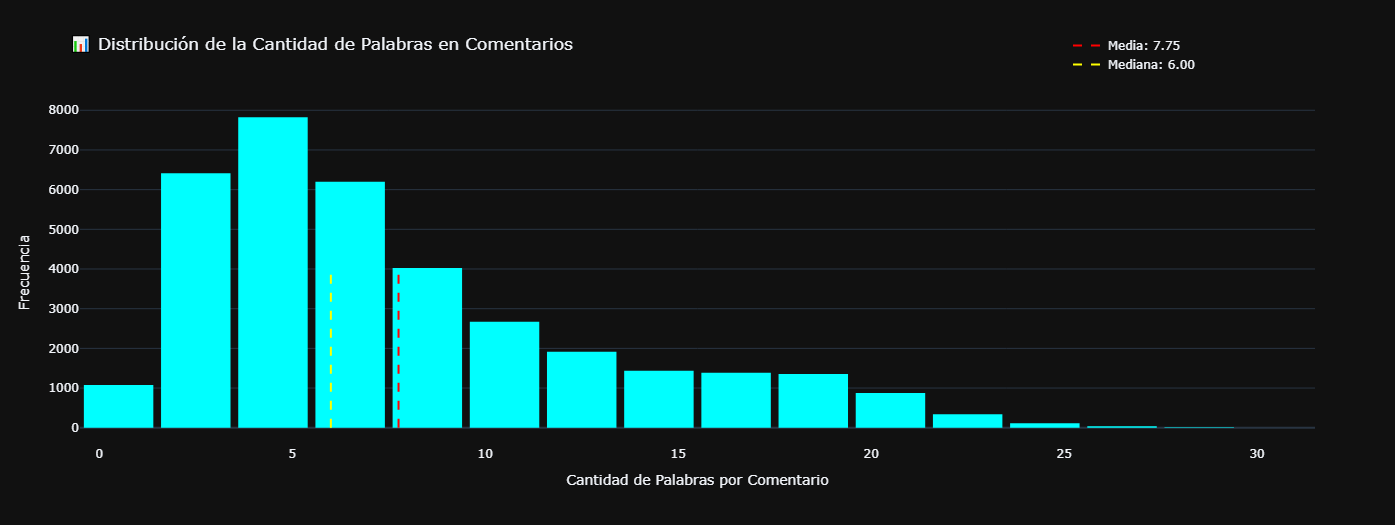

# 📊 Gráfico de Frecuencia de Palabras Más Comunes en Comentarios

En este gráfico interactivo, visualizamos las **palabras más frecuentes** en los comentarios de los productos. El proceso para generar este gráfico es el siguiente:

1. **Conteo de Tokens**: Primero, se extraen todos los tokens (palabras) de los comentarios. Luego, se cuentan cuántas veces aparece cada palabra.
2. **Selección de las Más Comunes**: Se seleccionan las 50 palabras más frecuentes en los comentarios.
3. **Gráfico de Barras Interactivo**: Utilizando **Plotly**, se crea un gráfico de barras que muestra las 25 palabras más comunes y su frecuencia en el conjunto de datos. La frecuencia se indica con la altura de las barras.




In [ ]:
# Función para obtener los tokens o n-gramas más frecuentes
def obtener_top_tokens(df, columna_tokens='tokens_comentario', top_n=50):
    todos_los_tokens = [token for tokens in df[columna_tokens] for token in tokens]
    conteo_tokens = Counter(todos_los_tokens)
    return conteo_tokens.most_common(top_n)

# Función para crear un DataFrame desde los conteos de frecuencia
def crear_df_frecuencias(conteo, columnas=['Palabra', 'Frecuencia']):
    return pd.DataFrame(conteo.items(), columns=columnas)

# Función general para crear gráficos de barras interactivos
def graficar_frecuencias_top(df, titulo, xlabel, nombre_columna):
    fig = px.bar(df, x=nombre_columna, y='Frecuencia',
                 title=titulo,
                 labels={nombre_columna: xlabel, 'Frecuencia': 'Frecuencia'},
                 color='Frecuencia',
                 color_continuous_scale='Viridis')

    # Personalizar el gráfico
    fig.update_layout(
        template='plotly_dark',
        xaxis_title=xlabel,
        yaxis_title='Frecuencia',
        title={'x': 0.5, 'y': 0.95, 'font': {'size': 20, 'family': 'Arial, sans-serif'}},
        xaxis=dict(tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='gray'),
        legend=dict(x=0.8, y=1.1),
        bargap=0.2
    )

    # Mostrar el gráfico interactivo
    fig.show()

# Obtener los top 50 tokens y graficar
top_50_tokens = obtener_top_tokens(df_comentarios, 'tokens_comentario', 50)
top_50_tokens_df = crear_df_frecuencias(dict(top_50_tokens))

# Graficar los 25 tokens más frecuentes
graficar_frecuencias_top(top_50_tokens_df.head(25),
                         '🔝 Top 25 Palabras Más Frecuentes en Comentarios',
                         'Palabras',
                         'Palabra')



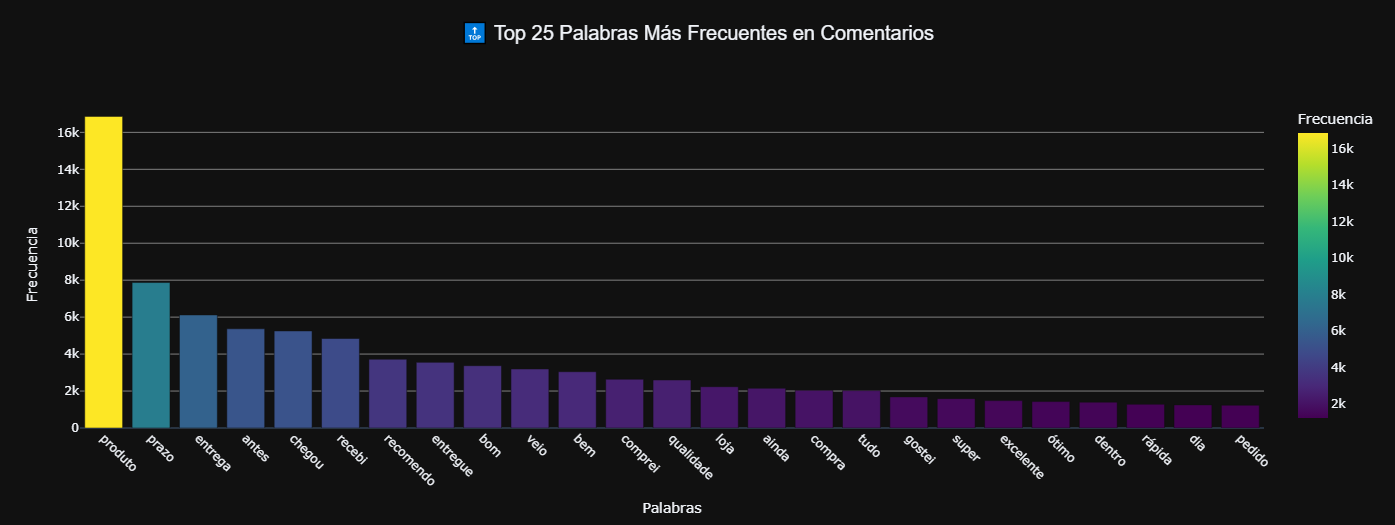

## 🔠 Análisis de Bigramas en Comentarios

### 🧠 Descripción:
Se realizó un **análisis de bigramas** (combinaciones de dos palabras consecutivas) en los comentarios de los clientes, con el objetivo de **identificar patrones de palabras más frecuentes** que puedan reflejar **tendencias comunes** o **problemas recurrentes**.


### 🎯 ¿Qué esperamos obtener?
- **Identificar patrones comunes** en los comentarios (por ejemplo, “producto malo”, “entrega rápida”).
- **Detectar temas recurrentes** que pueden **influir en la satisfacción del cliente**.
- **Aportar contexto semántico** al análisis de sentimientos y **mejorar la interpretación del comportamiento del consumidor**.


In [ ]:
# Función para limpiar el texto y asegurarnos de que los tokens sean listas de palabras
def limpiar_tokens(lista_tokens):
    if isinstance(lista_tokens, list):  # Verificamos que sea una lista
        return [re.sub(r'\W+', '', palabra).lower() for palabra in lista_tokens if palabra.isalpha()]
    return []

# Generador de bigramas y contador de frecuencias
def obtener_top_ngrams(df, columna_tokens='tokens_comentario', n=2, top_n=25):
    lista_tokens_limpios = df[columna_tokens].apply(limpiar_tokens)  # Limpiamos los tokens

    conteo_ngrams = Counter(
        ngram for tokens in lista_tokens_limpios if len(tokens) > 1  # Filtramos listas vacías
        for ngram in ngrams(tokens, n)
    )

    # Convertir los bigramas a strings legibles
    df_ngrams = pd.DataFrame(conteo_ngrams.most_common(top_n), columns=['Bigram', 'Frecuencia'])
    df_ngrams['Bigram'] = df_ngrams['Bigram'].apply(lambda x: ' '.join(x))  # Convertir tupla a string
    return df_ngrams

# Función para graficar bigramas
def graficar_frecuencias_top_ngrams(df, titulo, xlabel):
    fig = px.bar(df, x='Bigram', y='Frecuencia',
                 title=titulo,
                 labels={'Bigram': xlabel, 'Frecuencia': 'Frecuencia'},
                 color='Frecuencia',
                 color_continuous_scale='Viridis')

    # Personalizar el gráfico
    fig.update_layout(
        template='plotly_dark',
        xaxis_title=xlabel,
        yaxis_title='Frecuencia',
        title={'x': 0.5, 'y': 0.95, 'font': {'size': 20, 'family': 'Arial, sans-serif'}},
        xaxis=dict(tickangle=45),
        yaxis=dict(showgrid=True, gridcolor='gray'),
        bargap=0.2
    )

    fig.show()

# Generar los top 10 bigramas y graficar
top_bigrams_df = obtener_top_ngrams(df_comentarios, columna_tokens='tokens_comentario', n=2, top_n=10)

# Graficar los 10 bigramas más frecuentes
graficar_frecuencias_top_ngrams(top_bigrams_df,
                                '🔝 Top 10 Bigramas Más Frecuentes en Comentarios',
                                'Bigramas')





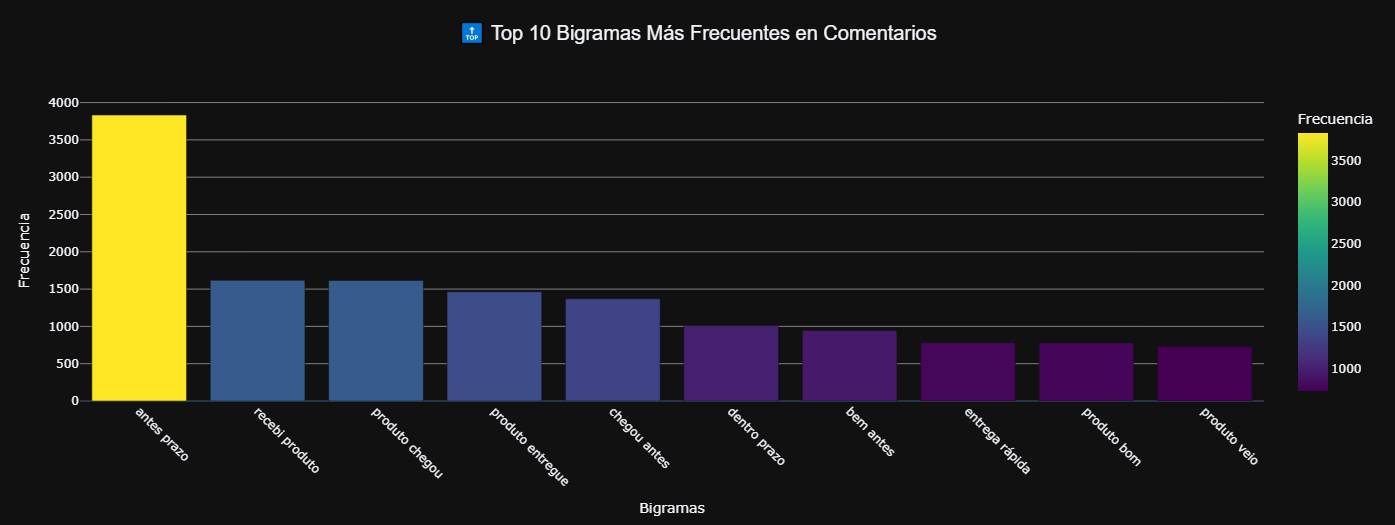

## 📊 Visualización de la Distribución de Sentimientos

### 🧠 Descripción:
Se generó un **gráfico de torta interactivo** utilizando **Plotly Express** para **visualizar la distribución de los sentimientos** (positivos, neutros, negativos) en las reseñas.  
Esto **permite entender el balance de las clases** antes de entrenar los modelos.




In [ ]:
# Contar la cantidad de cada categoría de sentimiento
sentiment_counts = df_comentarios["comentario_limpio_sentimiento"].value_counts().reset_index()
sentiment_counts.columns = ["Sentimiento", "Cantidad"]

# Crear gráfico de torta interactivo con colores Viridis
fig = px.pie(sentiment_counts,
             values="Cantidad",
             names="Sentimiento",
             title="📊 Distribución de Sentimientos en los Comentarios",
             color_discrete_sequence=px.colors.sequential.Viridis)

# Personalizar diseño con fondo negro
fig.update_layout(template="plotly_dark",
                  title_font_size=16,
                  title_x=0.5)  # Centrar título

# Mostrar gráfico
fig.show()


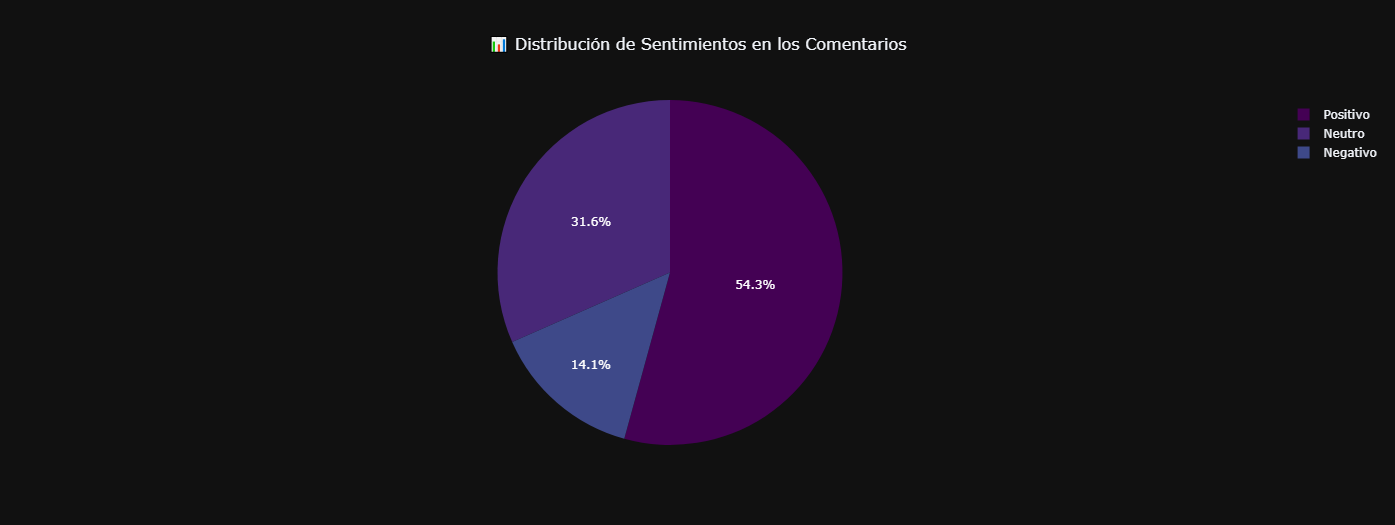

## 🔄 Preparación de los Datos para Entrenamiento

### 🧠 ¿Qué hacemos en esta etapa?

1. **Definimos Variables Predictoras y Objetivo:**
   - **X:** Comentarios de reseñas (`review_comment_message`), que **serán transformados en vectores numéricos más adelante**.
   - **y:** Sentimiento asociado a cada reseña (`comentario_limpio_sentimiento`), que es **la variable objetivo** que queremos **predecir**.

2. **Codificación de la Variable Objetivo:**
   - Convertimos los **sentimientos en valores numéricos** usando `LabelEncoder()`.  
   - Ejemplo:  
     - **Negativo → 0**
     - **Neutro → 1**
     - **Positivo → 2**

3. **División del Conjunto de Datos:**
   - **Separación en datos de entrenamiento (80%) y de prueba (20%)**.
   - **Estrategia estratificada** (`stratify=y_codificado`) para **mantener la proporción de clases** en ambos conjuntos.

### 🎯 ¿Por qué es importante?
- **Estandarizamos el objetivo (sentimientos) a valores numéricos**, necesario **para entrenar los modelos**.
- **Aseguramos que todas las clases estén bien representadas** tanto en el entrenamiento como en el test.
- **Dejamos los datos listos** para **vectorizarlos con TF-IDF** y **entrenar los modelos de clasificación**.


In [ ]:
# 1. Definir las variables predictoras y objetivo
X = df_comentarios['review_comment_message']  # Texto de los comentarios
y = df_comentarios['comentario_limpio_sentimiento']  # Sentimiento asociado

# 2. Convertir los sentimientos en valores numéricos
codificador_sentimiento = LabelEncoder()
y_codificado = codificador_sentimiento.fit_transform(y)

# Verificar la codificación
print("Clases codificadas:", codificador_sentimiento.classes_)
print("Valores únicos en y_codificado después de la conversión:", np.unique(y_codificado))

# 3. División de datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y_codificado, test_size=0.2, random_state=42, stratify=y_codificado
)



Clases codificadas: ['Negativo' 'Neutro' 'Positivo']
Valores únicos en y_codificado después de la conversión: [0 1 2]


## 📝 Representación de Textos con Vectorizador TF-IDF

### 🧠 ¿Qué es TF-IDF?
El **vectorizador TF-IDF (Term Frequency - Inverse Document Frequency)** convierte los textos de reseñas en **vectores numéricos** que representan la importancia de las palabras.  
**Otorga mayor peso a las palabras relevantes** en cada reseña, mientras que **penaliza las que son muy comunes** en todos los textos.

---

### ⚙️ Configuración Utilizada
Se configuró el vectorizador TF-IDF con **mejoras específicas para captar mejor el contexto de las reseñas**:

| Parámetro                 | Descripción |
|---------------------------|-------------|
| **max_features=5000**      | **Limita a 5000 palabras más relevantes** para **reducir dimensionalidad** y **evitar sobreajuste**.|
| **ngram_range=(1,2)**      | Considera **unigramas (palabras individuales)** y **bigramas (pares de palabras)**, **captando mejor el contexto** y las **combinaciones de términos**.|
| **sublinear_tf=True**      | Aplica **suavizado logarítmico** para **evitar que términos muy frecuentes dominen el modelo**, equilibrando mejor los pesos.|

---

### 📊 ¿Qué Esperamos Obtener?
- **Representación numérica más rica y precisa** de las reseñas.
- **Captar matices en las opiniones** gracias a los bigramas.
- **Reducir ruido y mejorar la eficiencia** limitando a las **5000 características más relevantes**.
- **Preparar los datos de texto** para **entrenar los modelos de clasificación** (Red Neuronal, Random Forest, Regresión Logística).


In [ ]:
#  Vectorizador TF-IDF con mejoras
vectorizador_tfidf = TfidfVectorizer(
    max_features=5000,   # Limita la cantidad de palabras para reducir dimensionalidad
    ngram_range=(1,2),  # Considera unigramas y bigramas para captar más contexto
    sublinear_tf=True   # Aplica suavizado logarítmico para evitar sesgo por términos muy frecuentes
)

#  Transformamos los textos en vectores TF-IDF
X_entrenamiento_tfidf = vectorizador_tfidf.fit_transform(X_entrenamiento)
X_prueba_tfidf = vectorizador_tfidf.transform(X_prueba)

#  Conversión a arrays densos solo si es necesario
X_entrenamiento_denso = X_entrenamiento_tfidf.toarray()
X_prueba_denso = X_prueba_tfidf.toarray()

#  Verificación del vectorizador
print(f"Cantidad de términos seleccionados: {len(vectorizador_tfidf.get_feature_names_out())}")
print("Ejemplo de términos seleccionados:", vectorizador_tfidf.get_feature_names_out()[:10])  # Muestra 10 términos


Cantidad de términos seleccionados: 5000
Ejemplo de términos seleccionados: ['00' '01' '01 2018' '02' '02 2018' '03' '03 2018' '04' '04 18' '04 2018']


## 🌲 Entrenamiento y Optimización del Modelo Random Forest

### 🧠 Descripción General
Se implementó y optimizó un modelo **Random Forest** para la **clasificación automática de reseñas en positiva, neutra y negativa**.  
El objetivo fue **evaluar su rendimiento** y **compararlo con otros modelos (red neuronal y regresión logística)**, considerando posteriormente **su impacto económico en el negocio**.

---

### 📋 Pasos Seguidos
1. **Definición del Modelo Base:**  
   Se configuró un **RandomForestClassifier** como punto de partida.

2. **Espacio de Búsqueda de Hiperparámetros:**  
   Se definieron **diferentes combinaciones** de:
   - Número de árboles (`n_estimators`)
   - Profundidad máxima (`max_depth`)
   - Muestras mínimas para dividir (`min_samples_split`)
   - Muestras mínimas por hoja (`min_samples_leaf`)

3. **Optimización con RandomizedSearchCV:**  
   Se utilizó **búsqueda aleatoria** con **validación cruzada** para **encontrar la mejor combinación de hiperparámetros**.

4. **Entrenamiento Final:**  
   Se entrenó el modelo con **los mejores hiperparámetros encontrados**.

5. **Evaluación:**  
   - **Exactitud (accuracy)** sobre datos de prueba.
   - **Reporte de Clasificación (precision, recall, F1-score)**.
   - **Matriz de Confusión** para **visualizar errores**.
   
### Reporte de clasificación con:
- Precision: Qué porcentaje de las predicciones positivas fue correcto.
- Recall: Qué porcentaje de los casos positivos reales se identificaron correctamente.
- F1-Score: Media armónica entre precisión y recall.
- Soporte: Cantidad de ejemplos de cada clase.

Fitting 2 folds for each of 10 candidates, totalling 20 fits
📌 Mejores parámetros encontrados: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
✅ Exactitud del modelo en test: 0.8697

📊 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.60      0.71      1008
           1       0.80      0.91      0.85      2257
           2       0.91      0.92      0.92      3874

    accuracy                           0.87      7139
   macro avg       0.86      0.81      0.82      7139
weighted avg       0.87      0.87      0.87      7139



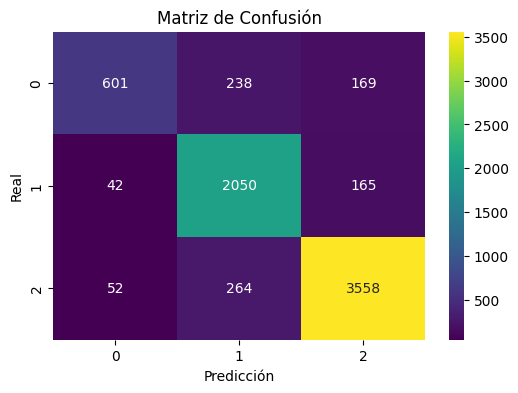

In [ ]:
#  Definimos el modelo base
modelo_rf = RandomForestClassifier(random_state=42)

#  Definimos el espacio de búsqueda de hiperparámetros
parametros_rf = {
    'n_estimators': [50, 100],  # Número de árboles
    'max_depth': [10, 20, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5 ],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],  # Mínimo de muestras en una hoja
    'bootstrap': [True]  # Si se usa muestreo con reemplazo
}

#  Realizamos la búsqueda aleatoria con validación cruzada
busqueda_rf = RandomizedSearchCV(
    modelo_rf, parametros_rf, n_iter=10, cv=2, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2
)
busqueda_rf.fit(X_entrenamiento_denso, y_entrenamiento)

#  Extraemos el mejor modelo
mejor_rf = busqueda_rf.best_estimator_
print(f"📌 Mejores parámetros encontrados: {busqueda_rf.best_params_}")

#  Evaluamos en datos de prueba
y_pred = mejor_rf.predict(X_prueba_denso)

#  Cálculo de métricas
accuracy = accuracy_score(y_prueba, y_pred)
print(f"✅ Exactitud del modelo en test: {accuracy:.4f}")

#  Reporte de clasificación
print("\n📊 Reporte de Clasificación:\n", classification_report(y_prueba, y_pred))

#  Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_prueba, y_pred), annot=True, cmap="viridis", fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title( "Matriz de Confusión")
plt.show()




## 🌲 Resultados del Modelo Random Forest

### 🏆 Mejores Parámetros Encontrados:
- **n_estimators:** 100  
- **min_samples_split:** 2  
- **min_samples_leaf:** 2  
- **max_depth:** None  
- **bootstrap:** True

### 📊 Desempeño del Modelo:
- **Exactitud (Accuracy):** 0.8697 (86.97%)
- **Reporte de Clasificación:**

| Clase | Precision | Recall | F1-score | Soporte |
|-------|------------|--------|----------|---------|
| 0 (Negativa) | 0.86 | 0.60 | 0.71 | 1008 |
| 1 (Neutra)   | 0.80 | 0.91 | 0.85 | 2257 |
| 2 (Positiva) | 0.91 | 0.92 | 0.92 | 3874 |

- **Macro promedio F1-score:** 0.82  
- **Weighted promedio F1-score:** 0.87

### 🔎 Interpretación de los Resultados:
- **Buen desempeño global**.
- **Clase negativa (0)** presenta **dificultades en el recall (0.60)**, lo que **implica que se pasan por alto varias reseñas negativas**, **afectando potencialmente la retención de clientes**.
- **Clases neutra (1) y positiva (2)** muestran **buen rendimiento**, pero **identificar correctamente reseñas negativas es clave** para **evitar pérdidas económicas** en el negocio.

### 🏆 Conclusión:
Si bien **el Random Forest ofrece resultados aceptables**, su débil desempeño en la clase negativa (recall 0.60),  lo hace menos adecuado ya que identificar reseñas negativas con precisión es esencial para proteger el valor económico del negocio.


## 🧠 Entrenamiento de Red Neuronal para Clasificación de Sentimientos

### 🎯 Objetivo
Entrenar una **red neuronal profunda** para **clasificar reseñas de clientes** en **positivas, neutras y negativas**, evaluando su **capacidad predictiva** y **potencial económico** en el e-commerce.

---

### 🔄 Pasos Seguidos

-  **Codificación de las Etiquetas:** Convertimos las clases de reseñas (positiva, neutra, negativa) a formato one-hot encoding, necesario para redes neuronales multicategoría.
- **Definición del Modelo:** Creamos una red neuronal profunda con varias capas densas y Dropout, diseñada para captar patrones complejos en los datos de texto.
- **Configuración del Optimizador:** Usamos el optimizador Adam con tasa de aprendizaje de 0.001, adecuado para este tipo de problemas de clasificación.
- **Entrenamiento:** Ajustamos el modelo con 50 épocas y batch size de 32, con validación sobre el conjunto de prueba para monitorear su desempeño.
- **Evaluación:** Calculamos la exactitud (accuracy), reporte de clasificación (precisión, recall y F1-score) y visualizamos la matriz de confusión.
- **Objetivo Final:** Obtener un modelo con **alta precisión**, capaz de **clasificar correctamente reseñas positivas y negativas**, ya que estas **influyen directamente en las decisiones de compra y retención de clientes**. Evaluaremos luego su **impacto económico** en el negocio e-commerce.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7314 - loss: 0.6137 - val_accuracy: 0.9091 - val_loss: 0.2806
Epoch 2/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9369 - loss: 0.2152 - val_accuracy: 0.9095 - val_loss: 0.2908
Epoch 3/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9624 - loss: 0.1299 - val_accuracy: 0.9053 - val_loss: 0.3219
Epoch 4/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9727 - loss: 0.0876 - val_accuracy: 0.9083 - val_loss: 0.4006
Epoch 5/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9820 - loss: 0.0633 - val_accuracy: 0.9036 - val_loss: 0.4607
Epoch 6/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 24s 27ms/step - accuracy: 0.9871 - loss: 0.0412 - val_accuracy: 0.9045 - val_loss: 0.5332
Epoch 7/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9046 - val_loss: 0.5580
Epoch 8/50
893/893 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9910 - loss: 0.0304 - 

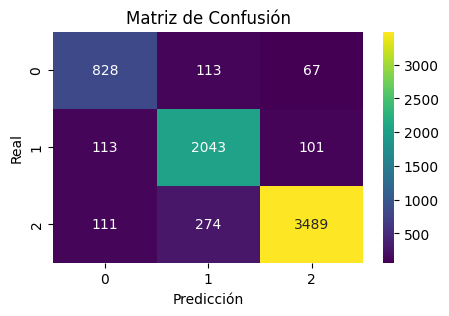

In [ ]:
# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_entrenamiento)
y_test_cat = to_categorical(y_prueba)

# Modelo más profundo con más épocas
def crear_modelo():
    modelo = Sequential([
        Dense(256, activation='relu', input_shape=(X_entrenamiento_denso.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    opt = Adam(learning_rate=0.001)
    modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return modelo

modelo_nn = crear_modelo()

historial = modelo_nn.fit(X_entrenamiento_denso, y_train_cat, epochs=50, batch_size=32, validation_data=(X_prueba_denso, y_test_cat))

# Evaluación
y_pred = modelo_nn.predict(X_prueba_denso)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_prueba, y_pred_classes)
print(f"Exactitud en test: {accuracy:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_prueba, y_pred_classes))

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_prueba, y_pred_classes), annot=True, cmap="viridis", fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## 📊 Resultados del Modelo de Red Neuronal

### 🏆 Desempeño del Modelo:
- **Exactitud (Accuracy):** 0.8909 (89.09%)
- **Reporte de Clasificación:**

| Clase | Precision | Recall | F1-score | Soporte |
|-------|------------|--------|----------|---------|
| 0 (Negativa) | 0.79 | 0.82 | 0.80 | 1008 |
| 1 (Neutra)   | 0.84 | 0.91 | 0.87 | 2257 |
| 2 (Positiva) | 0.95 | 0.90 | 0.93 | 3874 |

- **Macro promedio F1-score:** 0.87  
- **Weighted promedio F1-score:** 0.89

### 🔎 Interpretación de los Resultados:
- **Excelente rendimiento global** con una **exactitud del 89%**.
- **Buen balance entre precisión y recall en todas las clases**, destacándose el desempeño en **clase positiva (2)**, **clave para aumentar ventas**.
- **Mejora notable en clase negativa (0)** con respecto a otros modelos, **identificando correctamente reseñas críticas**, **importante para evitar la pérdida de clientes**.

### 🏆 Conclusión:
  
**Su capacidad para clasificar reseñas negativas y positivas con altos valores de precisión y recall lo posiciona como la mejor opción** para **maximizar el impacto económico** en la plataforma de e-commerce.


In [ ]:


cm = confusion_matrix(y_prueba, y_pred_classes)

for i in range(len(cm)):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    print(f"Clase {i}:")
    print(f"  TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}\n")



Clase 0:
  TP: 828, FP: 224, FN: 180, TN: 5907

Clase 1:
  TP: 2043, FP: 387, FN: 214, TN: 4495

Clase 2:
  TP: 3489, FP: 168, FN: 385, TN: 3097



## 🧠 Entrenamiento del Modelo: Regresión Logística

### 🔍 Pasos Seguidos

1. **Balanceo de Clases**:  
   Ajustamos los pesos de cada clase porque **las reseñas no son equitativas** entre positivas, neutras y negativas.

2. **Escalado de Características**:  
   Aplicamos **StandardScaler()** porque **la regresión logística es sensible a las magnitudes de las variables**.

3. **Definición del Modelo**:  
   Utilizamos **Regresión Logística Multiclase (One-vs-Rest)**, con **pesos de clase balanceados** y **límite de iteraciones adecuado**.

4. **Optimización de Hiperparámetros**:  
   Implementamos **GridSearchCV** para **buscar los mejores parámetros** (regularización y solver).

5. **Entrenamiento Final y Evaluación**:  
   Entrenamos el modelo **con los mejores parámetros** y **evaluamos su exactitud, matriz de confusión y reporte de clasificación**.

---







Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Mejores parámetros: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Exactitud en test: 0.8802
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78      1008
           1       0.85      0.87      0.86      2257
           2       0.94      0.90      0.92      3874

    accuracy                           0.88      7139
   macro avg       0.84      0.87      0.85      7139
weighted avg       0.89      0.88      0.88      7139



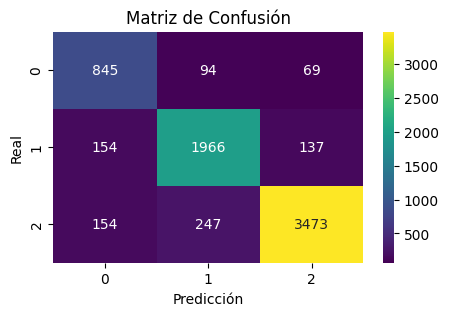

In [ ]:
# Calcular los pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_entrenamiento), y=y_entrenamiento)
class_weights = dict(enumerate(class_weights))

# Estándarización de las características
scaler = StandardScaler()
X_entrenamiento_scaled = scaler.fit_transform(X_entrenamiento_denso)
X_prueba_scaled = scaler.transform(X_prueba_denso)

# Definir el modelo de regresión logística
modelo_logistico = LogisticRegression(multi_class='ovr', class_weight=class_weights, max_iter=100)

# Definir los parámetros a optimizar (ajustados para búsqueda más rápida)
parametros = {
    'C': [0.01, 0.1, 1],  # Parámetro de regularización
    'solver': ['lbfgs'],    # Solo un solver
    'max_iter': [100],      # Número máximo de iteraciones
}

# Búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=modelo_logistico, param_grid=parametros, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_entrenamiento_scaled, y_entrenamiento)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
modelo_logistico_opt = grid_search.best_estimator_

# Evaluación
y_pred = modelo_logistico_opt.predict(X_prueba_scaled)
accuracy = accuracy_score(y_prueba, y_pred)
print(f"Exactitud en test: {accuracy:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_prueba, y_pred))

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_prueba, y_pred), annot=True, cmap="viridis", fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


## 📊 Resultados del Modelo de Regresión Logística

### 🏆 Mejores Parámetros Encontrados:
- **C (Regularización):** 0.01  
- **Máx. Iteraciones:** 100  
- **Solver:** lbfgs

### 📈 Métricas de Desempeño:
- **Exactitud (Accuracy):** 0.8802 (88.02%)
- **Reporte de Clasificación:**

| Clase | Precision | Recall | F1-score | Soporte |
|-------|------------|--------|----------|---------|
| 0 (Negativa) | 0.73 | 0.84 | 0.78 | 1008 |
| 1 (Neutra)   | 0.85 | 0.87 | 0.86 | 2257 |
| 2 (Positiva) | 0.94 | 0.90 | 0.92 | 3874 |

- **Macro promedio F1-score:** 0.85  
- **Weighted promedio F1-score:** 0.88

### 🔎 Interpretación :
- **Buen desempeño global (88% accuracy)**, aunque **la clase 0 (negativas)** es **la más difícil de clasificar**, mostrando **menor precisión**.
- **La clase positiva (2)** tiene **un rendimiento muy alto**, lo cual es clave **porque estas reseñas influyen directamente en el aumento de ventas**.



## 🧠📊 Elección del Modelo: Comparación de Métricas

Tras entrenar y evaluar **tres modelos diferentes** (Red Neuronal, Random Forest y Regresión Logística), **analizamos sus métricas de desempeño** sobre el conjunto de prueba.  
**Nuestro objetivo es seleccionar el modelo con mejor rendimiento** para luego **someterlo a la validación económica** y **determinar cuál genera el mayor impacto positivo en el negocio**.

| **Modelo**           | **Exactitud (Accuracy)** | **Macro F1-score** | **Clase 0 F1-score** | **Clase 1 F1-score** | **Clase 2 F1-score** |
|----------------------|--------------------------|---------------------|-----------------------|-----------------------|-----------------------|
| 🧠 **Red Neuronal**   | **0.89**                 | **0.87**           | **0.80**             | **0.87**             | **0.93**             |
| 🌲 **Random Forest**  | 0.87                     | 0.83               | 0.72                 | 0.85                 | 0.92                 |
| 🧮 **Reg. Logística** | 0.88                     | 0.85               | 0.78                 | 0.86                 | 0.92                 |

### 🏆 Conclusión Preliminar:
- **La Red Neuronal es el modelo con mejor desempeño general**, destacándose **especialmente en la Clase 0 (Reseñas Negativas)**, que **es clave para prevenir pérdidas económicas**.
- **El Random Forest tiene un rendimiento aceptable**, pero **su baja performance en la Clase 0 (F1-score 0.72)** podría **perjudicar la retención de clientes**.
- **La Regresión Logística también obtiene buenos resultados**, aunque **es superada por la Red Neuronal en casi todas las métricas**.

### 💼 Próximo Paso:
**Pondremos a prueba la Red Neuronal** (modelo seleccionado por su mejor desempeño) **en una simulación económica**, **para cuantificar su verdadero impacto monetario en el negocio**.  
**La validación económica será clave** para **determinar si el modelo realmente genera beneficios** y **justifica su implementación operativa**.


## 🧮 Evaluación Económica del Modelo de Análisis de Sentimientos

### 📊 Objetivo
El objetivo de esta evaluación es **cuantificar el impacto económico del modelo de análisis de sentimientos aplicado a las reseñas de clientes** en una plataforma de e-commerce. Buscamos traducir el desempeño del modelo en términos monetarios, estimando **cuánto valor económico genera el uso del modelo en el negocio**.

---

### 🔍 Metodología y Lógica del Código

El cálculo del impacto económico se basa en **el desempeño del modelo sobre las reseñas** y **su relación con las decisiones de compra y la retención de clientes**. Para ello, se establecen los siguientes ejes de análisis:

#### 1️⃣ **Casos en que el modelo genera valor**
- **Reseñas Positivas identificadas correctamente (Clase 2 - TP)**  
  Permiten destacar comentarios favorables en el sitio web, lo que **incrementa la confianza de otros clientes** y **puede aumentar las ventas**.

- **Reseñas Negativas identificadas correctamente (Clase 0 - TP)**  
  Permiten **detectar problemas y actuar rápidamente**, mejorando la experiencia del cliente y **evitando que se retire y deje de comprar**.

#### 2️⃣ **Casos en que el modelo genera pérdidas**
- **Reseñas Positivas NO identificadas (Clase 2 - FN)**  
  Implican **perder la oportunidad** de resaltar una buena experiencia, **reduciendo el potencial de venta**.

- **Reseñas Negativas clasificadas como Positivas por error (Clase 0 - FP)**  
  Implican **no abordar un problema real**, lo que puede llevar a **perder un cliente** insatisfecho.

#### 3️⃣ **Costos Operativos**
- **Costo por gestionar reseñas**  
  Cada reseña revisada (automatizada o manualmente) **implica un gasto de recursos**. En este caso, **asumimos que todas las reseñas relevantes detectadas por el modelo generan un costo por intervención**.

---

### 🧠 Hipótesis y Supuestos Utilizados

| Supuesto / Hipótesis                                      | Valor Asumido | Justificación                                                                 |
|------------------------------------------------------------|---------------|-------------------------------------------------------------------------------|
| **Valor promedio por venta**                                | 172 USD       | Calculado a partir del dataset                                               |
| **Valor de un cliente perdido**                             | 516 USD       | Equivalente a 3 compras anuales de 172 USD                                   |
| **Costo por reseña gestionada**                             | 7 USD         | Estimación del costo operativo por intervención                              |
| **Probabilidad de que una reseña positiva genere una venta**| 4% (0.04)     | Valor conservador basado en literatura sobre e-commerce                      |
| **Probabilidad de salvar un cliente al gestionar una negativa** | 5% (0.05) | Estimación basada en la importancia de la resolución de problemas            |
| **Probabilidad de perder un cliente por una reseña negativa no atendida** | 3% (0.03) | Estimación moderada                                                          |
| **Probabilidad de perder una venta por no destacar una reseña positiva** | 3% (0.03) | Estimación moderada                                                          |

---

### 📈 Métricas del Modelo de Redes Neuronales Utilizadas

El modelo de análisis de sentimientos es una **red neuronal multicategoría** que clasifica las reseñas en tres clases:
- **Clase 0: Negativa**
- **Clase 1: Neutra**
- **Clase 2: Positiva**

**Métricas del Modelo en el Conjunto de Test:**

| Clase | Precision | Recall | F1-score | TP  | FP  | FN  | TN  |
|-------|------------|--------|----------|-----|-----|-----|-----|
| 0 (Negativa) | 0.79 | 0.82 | 0.80 | 828 | 224 | 180 | 5907 |
| 1 (Neutra)   | 0.84 | 0.91 | 0.87 | 2043| 387 | 214 | 4495 |
| 2 (Positiva) | 0.95 | 0.90 | 0.93 | 3489| 168 | 385 | 3097 |

**Exactitud total (accuracy): 0.89 (89%)**

Estas métricas se utilizan como **base para estimar el volumen de reseñas bien y mal clasificadas** en función del volumen mensual de reseñas.

---

### 💰 Fórmulas Utilizadas

#### Impacto por mes:
- **Ganancia por reseñas positivas destacadas (TP Positivo - Clase 2):**
  $$
  \text{TP Positivos} \times P(\text{venta}) \times \text{Valor Venta}
  $$

- **Pérdida por no destacar reseñas positivas (FN Positivo - Clase 2):**
  $$
  \text{FN Positivos} \times P(\text{venta perdida}) \times \text{Valor Venta}
  $$

- **Ahorro por gestionar reseñas negativas (TP Negativo - Clase 0):**
  $$
  \text{TP Negativos} \times P(\text{cliente salvado}) \times \text{Valor Cliente}
  $$

- **Pérdida por ignorar reseñas negativas (FP Negativo - Clase 0):**
  $$
  \text{FP Negativos} \times P(\text{cliente perdido}) \times \text{Valor Cliente}
  $$

- **Costo de gestión:**
  $$
  \text{Cantidad de reseñas gestionadas} \times \text{Costo por reseña}
  $$

#### Impacto mensual total:
$$
\text{Impacto Mensual} = \text{Ganancia TP Positivos} + \text{Ahorro TP Negativos} - \text{Pérdida FN Positivos} - \text{Pérdida FP Negativos} - \text{Costo Gestión}
$$

#### Impacto :
$$
\text{Impacto} = \sum{\text{Impacto Mensual}}
$$

---

### 🧾 Resultado Final Obtenido
Luego de ajustar los parámetros a valores conservadores y realistas, la **ganancia anual estimada** por la implementación del modelo fue de:

$$
\mathbf{89,251.56\ USD}
$$

---

### 🏆 Conclusión Final
La implementación del modelo de análisis de sentimientos **demuestra ser rentable**, con una **ganancia anual estimada de aproximadamente 89,251 USD**.  
Este resultado **justifica la inversión en la mejora continua del modelo y su integración en los procesos de atención al cliente**, dado que **aporta beneficios económicos tangibles** en la industria del e-commerce.

**El valor generado proviene principalmente de**:
- **Mejorar la experiencia del cliente** al atender reseñas negativas.
- **Incrementar las ventas** al destacar reseñas positivas.
- **Automatizar la gestión de reseñas**, reduciendo tiempos de respuesta y aumentando la eficiencia operativa.

Este análisis **demuestra que un modelo de PLN aplicado a reseñas no solo tiene valor cualitativo**, sino que **su impacto económico puede ser medido y optimizado**, convirtiéndose en **una herramienta estratégica para el crecimiento del negocio**.

---
## Calculos:


In [ ]:
# Parámetros económicos ajustados
valor_promedio_venta = 172  # USD
valor_cliente_perdido = 516  # USD (3 compras/año)
costo_por_resena = 7  # USD por gestionar (ajustado)

# Probabilidades de impacto (más equilibradas)
prob_venta_por_resena_positiva = 0.04
prob_cliente_salvado_por_resena_negativa = 0.05
prob_cliente_perdido_por_resena_negativa = 0.03
prob_venta_perdida_por_resena_positiva = 0.03

# Métricas reales
tp_positivos = 3489  # Clase 2
fn_positivos = 385
tp_negativos = 828  # Clase 0
fp_negativos = 224

# Crear diccionario de frecuencia de reseñas mensuales (extraido de nuestro dataset)
frecuencia_reseñas_mensual = {
    '2016-10': 212, '2016-11': 118, '2016-12': 52, '2017-01': 299, '2017-02': 1716,
    '2017-03': 2941, '2017-04': 2389, '2017-05': 4434, '2017-06': 4074, '2017-07': 4166,
    '2017-08': 5404, '2017-09': 4949, '2017-10': 5329, '2017-11': 5711, '2017-12': 9451,
    '2018-01': 7198, '2018-02': 7115, '2018-03': 9328, '2018-04': 8590, '2018-05': 8875,
    '2018-06': 8091, '2018-07': 6527, '2018-08': 10360
}

# Simulación determinística (esperado)
impacto_anual = 0
for mes, frecuencia_reseñas in frecuencia_reseñas_mensual.items():
    factor_mes = frecuencia_reseñas / 7139  # Escalar a las reseñas del test

    tp_positivos_mes = tp_positivos * factor_mes
    fn_positivos_mes = fn_positivos * factor_mes
    tp_negativos_mes = tp_negativos * factor_mes
    fp_negativos_mes = fp_negativos * factor_mes

    ganancia_tp_positivos = tp_positivos_mes * prob_venta_por_resena_positiva * valor_promedio_venta
    perdida_fn_positivos = fn_positivos_mes * prob_venta_perdida_por_resena_positiva * valor_promedio_venta
    ahorro_tp_negativos = tp_negativos_mes * prob_cliente_salvado_por_resena_negativa * valor_cliente_perdido
    perdida_fp_negativos = fp_negativos_mes * prob_cliente_perdido_por_resena_negativa * valor_cliente_perdido

    costo_total_resenas = (tp_positivos_mes + fn_positivos_mes + tp_negativos_mes + fp_negativos_mes) * costo_por_resena

    impacto_mes = ganancia_tp_positivos + ahorro_tp_negativos - perdida_fn_positivos - perdida_fp_negativos - costo_total_resenas
    impacto_anual += impacto_mes

print(f"Ganancia estimada: {impacto:.2f} USD")
